# Probability FastAI - basic concepts
Credits to [Ronald Kneusel](https://github.com/rkneusel9), some of these examples are taken from his book just to illustrate simple probability examples. The github repo can be found [here](https://github.com/rkneusel9/MathForDeepLearning). All the explanations and clarifications are my own, only the code examples is generated from ChatGPT to not get bogged down with plotting and coming up with simple examples. This also means that it's possible that I'm wrong on some things, even if I have to the best of my ability sanity checked the information. If you find anything that is incorrect tell me, so I can fix it please! 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import multivariate_normal
import networkx as nx
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
np.random.seed(0)

## Dictionary
Before we start I thought it would be useful to define some words, luckily there aren't that many of them here.
* r.v = shorthand for random variable
* i.i.d = independent and identically distributed. Usually applies to random variables and just means that the random variables between each other are independent, so they are mutually independent. Identical refers to their probability distributions being identical, meaning the same. So for instance if one r.v is standard normal distribution, then if it's i.i.d to the other r.vs it means that the other r.vs must also be exactly standard normal distribution i.e. have mean = 0 and std = 1. The independent part just means that you can treat them as independent in relation to each other, which makes calculations such as joint probability or conditional probability easier. 
* LLN = law of large numbers
* Sampling = drawing a number from a distribution. The frequency at which you will get a certain type of number is entirely determined by the distribution you are drawing from.
* $1e^n$ is a shorthand for $1*10^n$. For instance if you want to write 1000000 you would see that it contains 6 zeros, so you can write it as $1e^6$.
* Frequency = number of occurrences of a type of data. Let f(x) give back the number of occurrences for a type of data. For instance $\{ 1,1,1,3,2,4,5,5,10,10,10\}$, then the frequencies for all the types of data is $f(1)=3,f(2)=1,f(3)=1,f(4)=1,f(5)=2,f(10)=3$. Frequency is important, because from a frequentist viewpoint the probability is just the proportion of the frequency of an event over all possible outcomes. So if we were to convert the data we had to probabilities then we would get each of their proportions in relation to the size of the data using the formula $\frac{frequency}{\text{total outcomes}}$, $p(1)=3/11,p(2)=1/11,p(3)=1/11,p(4)=1/11,p(5)=2/11,p(10)=3/11$.
* Normalization = In probability theory if we normalize a probability distribution, it means that we make it sum up to 1, which makes it a valid probability distribution.
* function f is the same as the function with a parameter like f(x). I sometimes don't write it out for brevity if it's apparent from the context.
* Gaussian distribution is the same as Normal distribution, people use the names interchangeably.
* Mean is the same as average.

# Outline
This notebook will cover miscellaneous basic probability theories.
1. [Sample space and events](#1-Sample-space-and-events)
2. [Dependence and independence](#2-Dependence-and-independence)
3. [Simple probability with repeated coin flips (fair coin)](#3-Simple-probability-with-repeated-coin-flips)
4. [Random variable - what is it?](#4-Random-variable)
5. [Expectation](#5-Expectation)
6. [Law of large numbers](#6-Law-of-large-numbers)
7. [Monte Carlo sampling - expectation](#7-Monte-Carlo-sampling)
8. [Normalization - the idea](#8-Normalization)
9. [Expectation, variance, std](#9-Expectation-variance-std)
10. [Covariance and correlation](#10-Covariance-and-correlation)
11. [Random vectors](#11-Random-vectors)
12. [Joint, marginal and conditional probability](#12-Joint-marginal-conditional-probability)
13. [Law of total probability](#13-Law-of-total-probability)
14. [Baye's theorem](#14-Bayes-theorem)
15. [Univariate gaussian distribution](#15-Univariate-gaussian-distribution)
16. [Multivariate gaussian distribution](#16-Multivariate-gaussian-distribution)
17. [Markov chain](#17-Markov-chain)
18. [Central limit theorem - CLT](#18-Central-limit-theorem)

Honestly if you don't have time for this the most important ones are
* Expectation
* Monte carlo sampling -> but this isn't super important in general, also I don't cover it to the extent needed, like including langevin sampling
* Joint, marginal and conditional
* Expectation, variance and std
* Correlation and covariance
* Baye's theorem
* Univariate and multivariate gaussian

## 1 Sample space and events
This shows the difference between sample space and events using a 6-sided die. Conceptually, even roll is a subset of the sample space, in this case the even rolls $[2,4,6]$ all come from the bigger set that is the sample space $[1,2,3,4,5,6]$. You can think of sample space as the set of all possible outcomes, and event as some part (subset) of this sample space. Mathematically it's defined as $$event \in \text{sample space}$$, or if we call event e and sample space $\Omega$, then we have $$e \in \Omega$$
The following code visualizes the probabilities of each die outcome $[1,2,3,4,5,6]$. Note that all the bars in the below image are part of the sample space, it's just that the even dice rolls intersects with it so the green color overrides the blue.

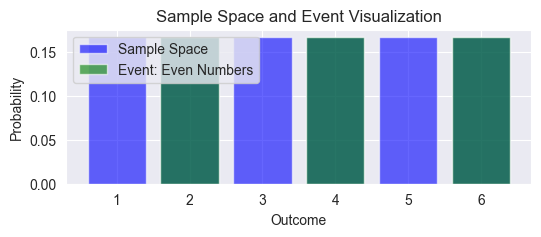

In [3]:
# Sample Space: Rolling a six-sided die
sample_space = [1, 2, 3, 4, 5, 6]

# Event: Rolling an even number
event_even = [2, 4, 6]

# Visualization
plt.figure(figsize=(6, 2))
plt.bar(sample_space, [1/6]*6, color='blue', alpha=0.6, label='Sample Space')
plt.bar(event_even, [1/6]*3, color='green', alpha=0.6, label='Event: Even Numbers')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Sample Space and Event Visualization')
plt.legend()
plt.show();


**Probability of an event**
The probability of an event is defined as the number of favorable outcomes divided by the total number of outcomes in the sample space. This is defined as $$P(event) = \frac{\text{favourable outcomes}}{outcomes}$$ 
In the example above if we were to calculate the probability of rolling even numbers, then the number of favourable outcomes are all the even numbers of the die which is 3 because we have number 2,4,6. The total outcomes is 6 because there are 6 numbers on a die. Therefore, the probability of rolling an even number is $$P(\text{even number}) = \frac{3}{6}$$

**Some basic properties of probability**
\
If $A_i$ is some event from the sample space $\Omega$, then we say $$0 \leq P(A_i) \leq 1$$. Furthermore, the total probability of all the events from the sample space $\Omega$ sums to 1 $$\sum_i P(A_i) = 1$$ 

## 2 Dependence and independence
* Independence = the occurrence of an event **does not** affect the occurrence of another event
* Dependence = the occurrence of an event **does** affect the occurrence of another event

And usually how this manifests is in the computation of probabilities. Independence makes it easier to compute probabilities. For instance joint probability $P(A,B) = P(A) * P(B)$ if A and B are independent events, whereas $P(A,B) = P(A|B) * P(B) = P(B|A) * P(A)$ if A and B are dependent.

Note that this also applies to random variables, i.e. a r.v X can be mutually independent to a r.v Y such that for instance $P(X,Y) = P(X) * P(Y)$. Below are some simple examples of independent random variables and dependent.

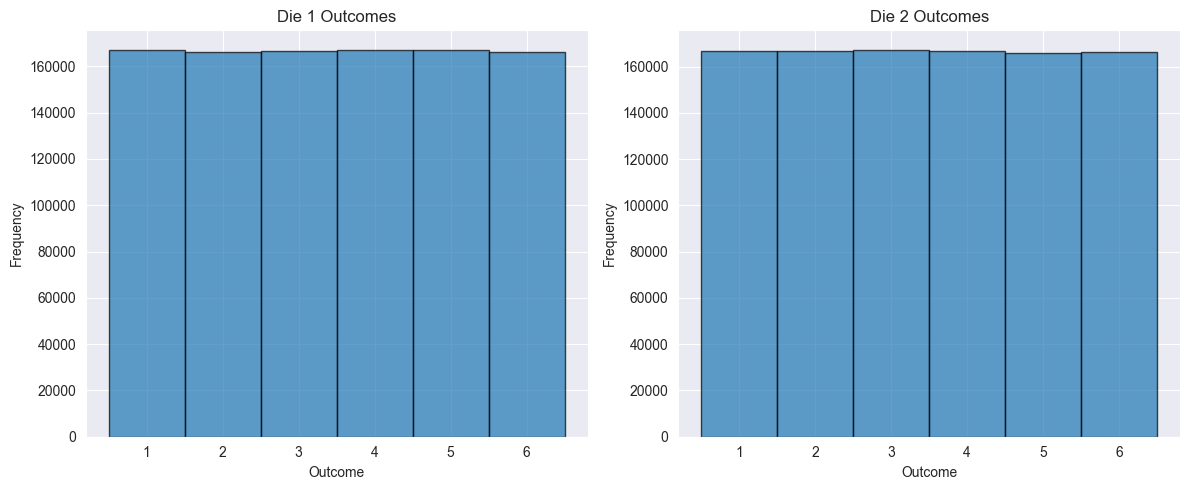

In [4]:
# Simulate rolling two dice
n_rolls = 1000000
die1 = np.random.randint(1, 7, n_rolls)
die2 = np.random.randint(1, 7, n_rolls)

# Plot the results
plt.figure(figsize=(12, 5))

# Histogram for die 1
plt.subplot(1, 2, 1)
plt.hist(die1, bins=np.arange(1, 8) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(1, 7))
plt.title('Die 1 Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

# Histogram for die 2
plt.subplot(1, 2, 2)
plt.hist(die2, bins=np.arange(1, 8) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(1, 7))
plt.title('Die 2 Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

This simulates rolling two independent dice 1000000 times. The outcome of rolling a die is independent of the outcome of rolling another die. They follow their own distribution, which is the uniform distribution, so it should be the same for both in the limit.

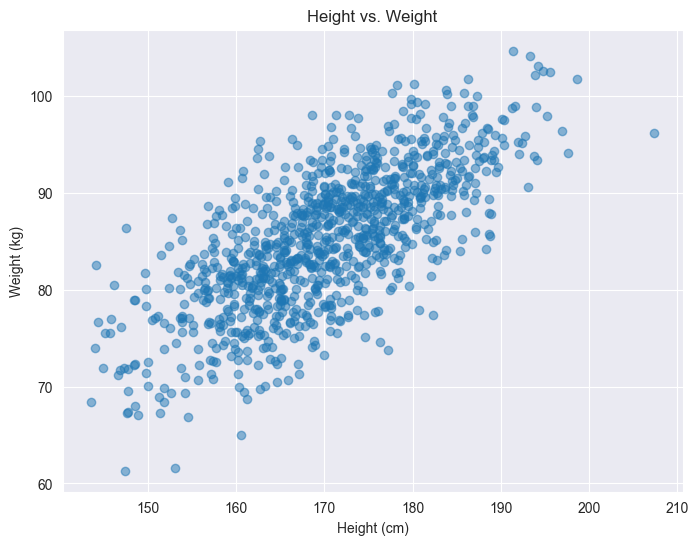

In [5]:
# Generate dependent random variables
n = 1000
height = np.random.normal(170, 10, n)  # Height in cm
weight = height * 0.5 + np.random.normal(0, 5, n)  # Weight dependent on height

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(height, weight, alpha=0.5)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show();

This generates 1000 samples of height from a normal distribution centered around 170 cm with a standard deviation of 10 cm. Weight is made dependent on height by multiplying height by 0.5 and adding some noise from a normal distribution. A scatter plot shows the relationship between height and weight. There is a positive **correlation**: as height increases, weight tends to increase as well. This illustrates dependency between the two variables.

## 3 Simple probability with repeated coin flips
Now moving on to an application of fair coins, where each coin only has two outcomes, tail or head. Here we flip 3 coins at the same time and compute the probability of the different events of getting a certain number of heads, i.e. 0 head, 1 head, 2 heads and 3 heads. Note that they are independent to each other.
The original table looks like below

![](assets/coinfliptable.png)

What this table is showing is the theoretical probability of flipping 3 coins at a time and getting the events as described in the heads column. The combination column is just the different ways to get that specific head event. What we want to achieve with the code below is to simulate this probability, to get it as close as possible. But before we move on to the code I will show how to compute these theoretical probabilities without doing experiments:
* Head=0 => $0.5^3 = 0.125$
* Head=1 => $0.5^3 + 0.5^3 + 0.5^3 = 3 * 0.5^3 = 0.375$
* Head=2 => $0.5^3 + 0.5^3 + 0.5^3 = 3 * 0.5^3 = 0.375$
* Head=3 => $0.5^3 = 0.125$

The following code will approximate the table, but would reproduce it in the limit (if we were to repeat the experiments to infinity). Note that head constitutes zero in the code

> The code runs 1,000,000 tests (N) simulating the flip of three coins (M).
The number of times each test ends up with 0, 1, 2, or 3 heads is stored in
heads. Each test selects three values in [0, 1] (flips) and counts how many
heads (a zero) show up. We use np.bincount for this and throw away the number
of tails. The number of heads is then tallied, and the next set of flips
happens.

Note that the original code tests for $1e^{6}$ tests, but I've opted for $1e^{4}$ to show the differences between the experiments and the ground truth. However, the experiments still almost converge. For the curious reader you can test around with different N values and see how the probability distribution changes.

In [6]:
# head constitutes zero

N = 10000
M = 3

heads = np.zeros(M+1)

for i in range(N):
    flips = np.random.randint(0,2,M)
    # bincount will return 1D array with 2 values in this case, [number_of_heads, number_of_tails], and we only extract the number of heads into variable h
    # what bincount does is it computes the number of occurrences of each number, in this case we have 0 or 1, 
    # so it will count the number of 0s and 1s (head=0, tail=1) and return it as a 1D array [number_of_heads, number_of_tails] 
    h, _ = np.bincount(flips, minlength=2)
    heads[h] += 1

prob = heads / N  # convert the frequencies to probabilities

print()
print("Probabilities: %s" % np.array2string(prob))
print()




Probabilities: [0.1248 0.3721 0.3781 0.125 ]


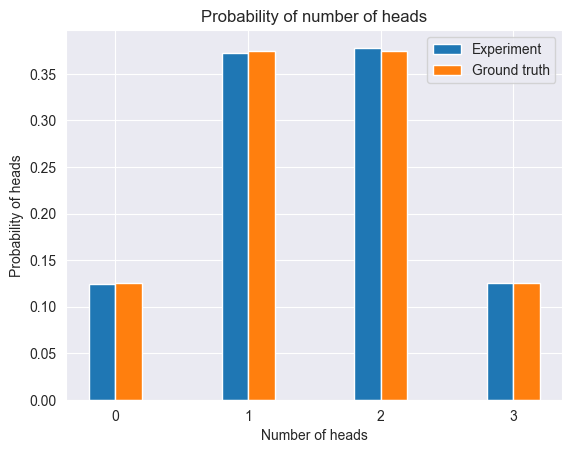

In [7]:
X = ['0','1','2','3']
experiment_probs = prob
ground_truth_probs = [0.125, 0.375, 0.375, 0.125]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, experiment_probs, 0.2, label = 'Experiment')
plt.bar(X_axis + 0.1, ground_truth_probs, 0.2, label = 'Ground truth')

plt.xticks(X_axis, X)
plt.xlabel("Number of heads")
plt.ylabel("Probability of heads")
plt.title("Probability of number of heads")
plt.legend()
plt.show();

![](assets/coinfliptable.png)

As can be seen the probabilities are pretty much the same, even though there is some small differences, which is to be expected. Try yourself with for instance rolling a die 6 times and see if you get the frequency $\frac{1}{6}$ of each possible number, you will see that it varies alot.

Now one might ask why does the experiments converge to the true distribution if we just increase the number of trials? This phenomenon is called [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), which basically says that as the number of samples from a random variable X or i.i.d random variables $X_1,...,X_n$ goes to infinity (think of it as sampling from X infinite number of times), then the sample mean (the mean of all our samples) of the trials will converge to the expectation of the random variable X i.e. $E[X]$. This is just to say that if you repeat the experiment over and over again there's a high chance that the sample mean will converge to the expected value (population mean). This sounds confusing but I will explain it in later sections. To understand this more and to formalize this observation we have to understand what random variables and expectation are.  

## 4 Random variable
A random variable is a function (in more advanced setting the correct definition is a [measureable function](https://en.wikipedia.org/wiki/Random_variable#Definition), which has a formal definition, but it's advanced math so I skip) that maps outcomes from a sample space to real values or discrete values. Note that r.v is a function that **models** randomness e.g. the outcome of a die.
However, it's important to note that random variable **is not the same thing as a PDF** (probability density function for continuous values) or PMF (probability mass function for discrete values). If we want to know the probability of the r.v X for certain outcomes x then we can compute $P(X = x)$, where X is the r.v and $x \in X$, but the r.v in and of itself is just a function mapping from sample space to real/discrete values, not a probability density/mass function. What the pdf/pmf of the r.v would capture is the randomness in X by describing it with a distribution.

This image illustrates what a random variable does by mapping outcomes from the sample space, like head or tail, to real numbers

![](assets/random_variable.png)

And this illustrates what a probability distribution would capture about a discrete random variable

![](assets/random_variable_distribution.png)

Unrelated to this picture let's consider a simple example. If the r.v X described a simple fair coin flip the probability of X would be uniform $P(X = head) = 0.5$ and $P(X = tail) = 0.5$. Or more properly if the sample space consisting of head and tail is $\Omega = \{head, tail\}$, then X would be a function mapping this to real or discrete numbers 

$$f(x) = 
\begin{cases} 
  & 0 & \text{if } \text{x is head} \\
  & 1 & \text{if } \text{x is tail} \\
\end{cases}$$

and the probability distribution of X would be a uniform probability mass function, because we are working with discrete inputs. Trying to model this random variable X we get the code below. Note that I skipped sampling from it and instead showed the theoretical pmf, because lazy, but it would be similar to the bar chart above with the coin flips, as the number of trials increases the probability would approach the theoretical probability, which in this case would have been 0.5 for head and tail respectively.

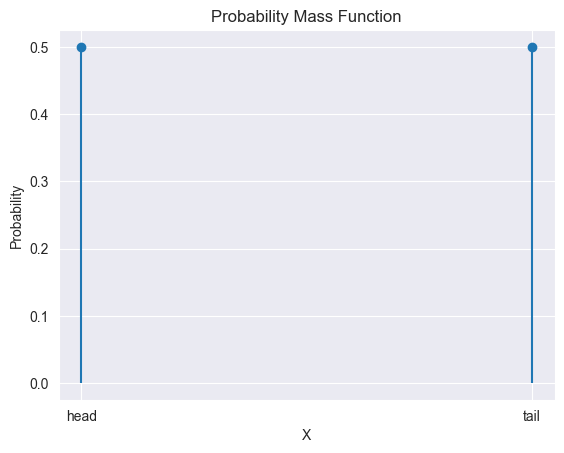

In [8]:
# example implementation of random variable, coin flip return 1 for head and 0 for tail. Note this is a convoluted way of doing it. The easy way is to just use a probability distribution and sample from it.
# I have just explicitly coded out the mapping just to show what it may look like
def random_variable_X():
    def __random_variable_X_mapping(x):
        # head
        if x == "h".lower():
            return 1
        # tail
        return 0
    
    sample = np.random.choice(['h','t'])  # uniform distribution, i.e. 50% head and 50% tail
    return __random_variable_X_mapping(sample)

# theoretical pmf
x = np.array(['head', 'tail'])  # Discrete values
p = np.array([0.5, 0.5])  # Corresponding probabilities

# Plot the PMF
plt.stem(x, p, markerfmt='o', basefmt=" ")

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Probability Mass Function')

# Set the x-axis ticks to be the same as the discrete values
X_axis = np.arange(len(x))
plt.xticks(X_axis, x)

# Show the plot
plt.show();

Once again, this shows the probability mass function, laying out the probability mass on the graph at the point of the heads and tails. This shows that the concentration of the probabilities on the head point and the tail point are both 0.5, meaning they have a 50% chance of occurring. The pmf always sums up to 0.5+0.5=1 as it's a valid probability distribution. Note that they call it probability mass if the r.v is discrete and probability density if the r.v is continuous. They both refer to the probability concentration at a certain point in the support of the r.v, meaning the domain of the r.v, in this case the x-values.


**Side comment - not valid probability distributions**
Distributions that do not sum up to 1, but are non-negative, are not valid probability distributions, like the likelihood (you can normalize it with bayes' theorem if the marginal is not intractable, which it unfortunately usually is), although it doesn't stop you from working with it as you are usually only interested in the maximum point (which does not change whether it is valid or not) or comparing probabilities for different parameters, which is fine to do (you just compare the values relative to each other). Briefly elaborating on the reason why the maximum point does not change for a likelihood, if we were to use something like MLE (maximum likelihood) is because normalizing the distribution (making it sum to 1) would only serve to scale the distribution values, and scaling a distribution or function will not change the optimum points of the distribution/function for the parameters, sure it will change the y-values at those points (if 2D) or z-values (if 3D) etc., but not where the parameters are located at the maximum. 

Just to show a very simple example to illustrate my point. Let's say we have three functions $f(x) = -x^2, f(x)=-3x^2, f(x)=-0.5x^2$, then we will have graphs produced by the code below. We can see that the optimum point is at x = 0. Now obviously scaling the function changes the location of the y-values (increases if scaled up or decreases if scaled down) for a given x value, but the point at which the optimum is does not change as can be seen.

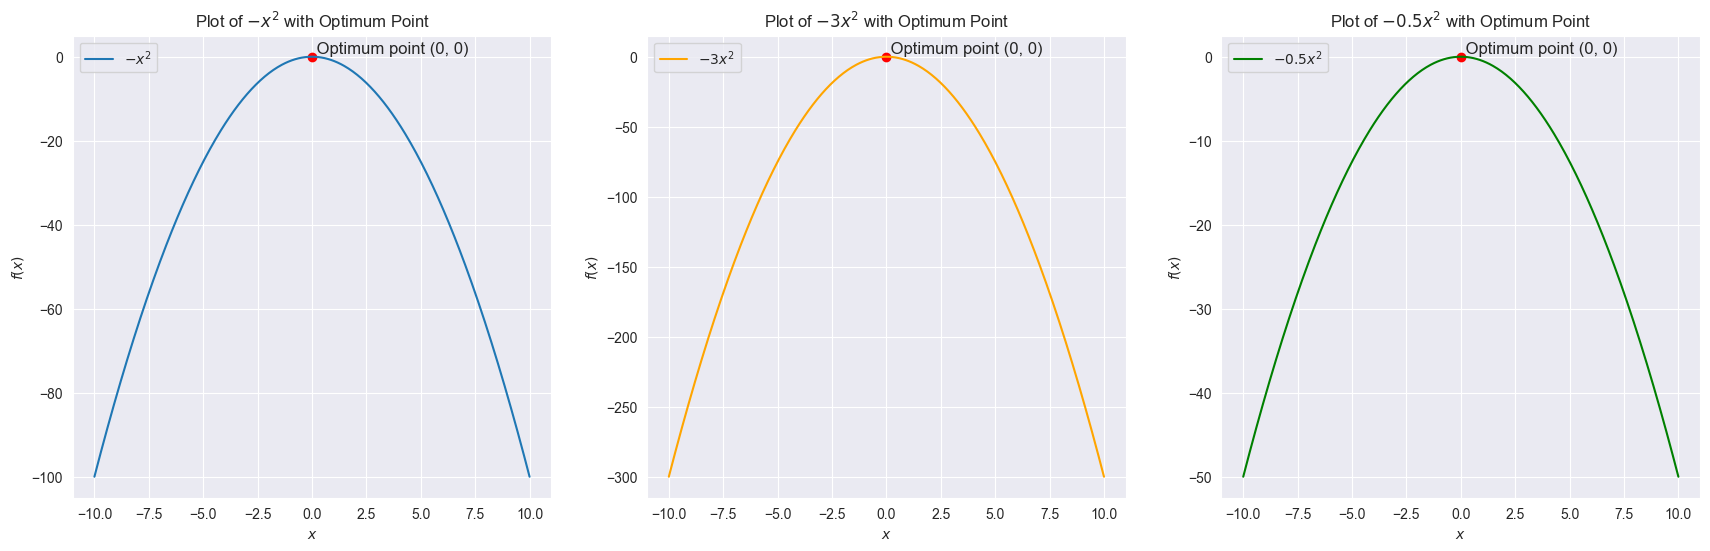

In [9]:
# Define the functions
def f1(x):
    return -x**2

def f2(x):
    return -3 * x**2

def f3(x):
    return -0.5 * x**2

x = np.linspace(-10, 10, 400)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

# Create the plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Plot for -x^2
ax1.plot(x, y1, label='$-x^2$')
ax1.scatter(0, f1(0), color='red')  # Optimum point
ax1.text(0, f1(0), ' Optimum point (0, 0)', fontsize=12, verticalalignment='bottom')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.set_title('Plot of $-x^2$ with Optimum Point')
ax1.legend()
ax1.grid(True)

# Plot for -3x^2
ax2.plot(x, y2, label='$-3x^2$', color='orange')
ax2.scatter(0, f2(0), color='red')  # Optimum point
ax2.text(0, f2(0), ' Optimum point (0, 0)', fontsize=12, verticalalignment='bottom')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$f(x)$')
ax2.set_title('Plot of $-3x^2$ with Optimum Point')
ax2.legend()
ax2.grid(True)

# Plot for -0.5x^2
ax3.plot(x, y3, label='$-0.5x^2$', color='green')
ax3.scatter(0, f3(0), color='red')  # Optimum point
ax3.text(0, f3(0), ' Optimum point (0, 0)', fontsize=12, verticalalignment='bottom')
ax3.set_xlabel('$x$')
ax3.set_ylabel('$f(x)$')
ax3.set_title('Plot of $-0.5x^2$ with Optimum Point')
ax3.legend()
ax3.grid(True)

# Show the plots
plt.show();

As you can clearly see, scaling the function up or down doesn't matter. It will change the y-values for the same x values, but the optimum point remains the same, namely at x = 0. What normalization does to a function is scaling it down, but it doesn't affect the location of the maximum point, that's why methods like MLE (maximum likelihood estimation) doesn't need to care about making the distribution valid (summing to 1), it only needs to find the maximum point, which is unchanged for the likelihood function.

## 5 Expectation
Expectation of a random variable X is denoted $E[X]$ and is the weighted sum/weighted mean of X. Specifically the weighted part comes from the probability distribution of the r.v. It can be written as $$E[X] = \sum_i p(x_i) * x_i$$, where $x_i \in X$. Note that this is for discrete values and for the continuous counterpart we have $$E[X] = \int p(x_i) * x_i \,dx$$. I usually like to think of it as a way to "ground" the randomness from the random variable, in this case it's by computing the weighted mean of it. In general people like to think of the expectation of a r.v or data as the mean of such, but in reality the mean of your data, unless it's the true data (data population), is only approximately the expected value of the data. This is because the expectation computes the population mean, the true mean of the data, which means the mean of the true data distribution. Aptly put the expectation computes the long-running average, which we will see soon. However, for imperfect data that are only seen as samples from the true distribution the expectation is not quite the mean of this data. Let's assume X is a discrete r.v, then this can be written as 
$$
\begin{align}
E[X] 
&= \sum_i p(x_i) * x_i \\
&\approx \frac{1}{n} \sum_i x_i \\
&= \bar{X}
\end{align}
$$ 

Note that this in general only applies if the data is sufficiently big. The following experiment will show why. 

Doing a thought experiment with dices again. We roll the die 5000 times and each time calculate the average of the current sum of die values that has occurred. If we assume the random variable X models the outcome of the die, then we can see that the sample mean converges to that of the expectation of the random variable as the number of trials increases. Once again, this phenomon is called law of large numbers. At the start it varies alot, but it gets more stable as more trials are done. Note you will get different starting appearances each time you run it, just to give you a flavour of how unstable it is at the start.

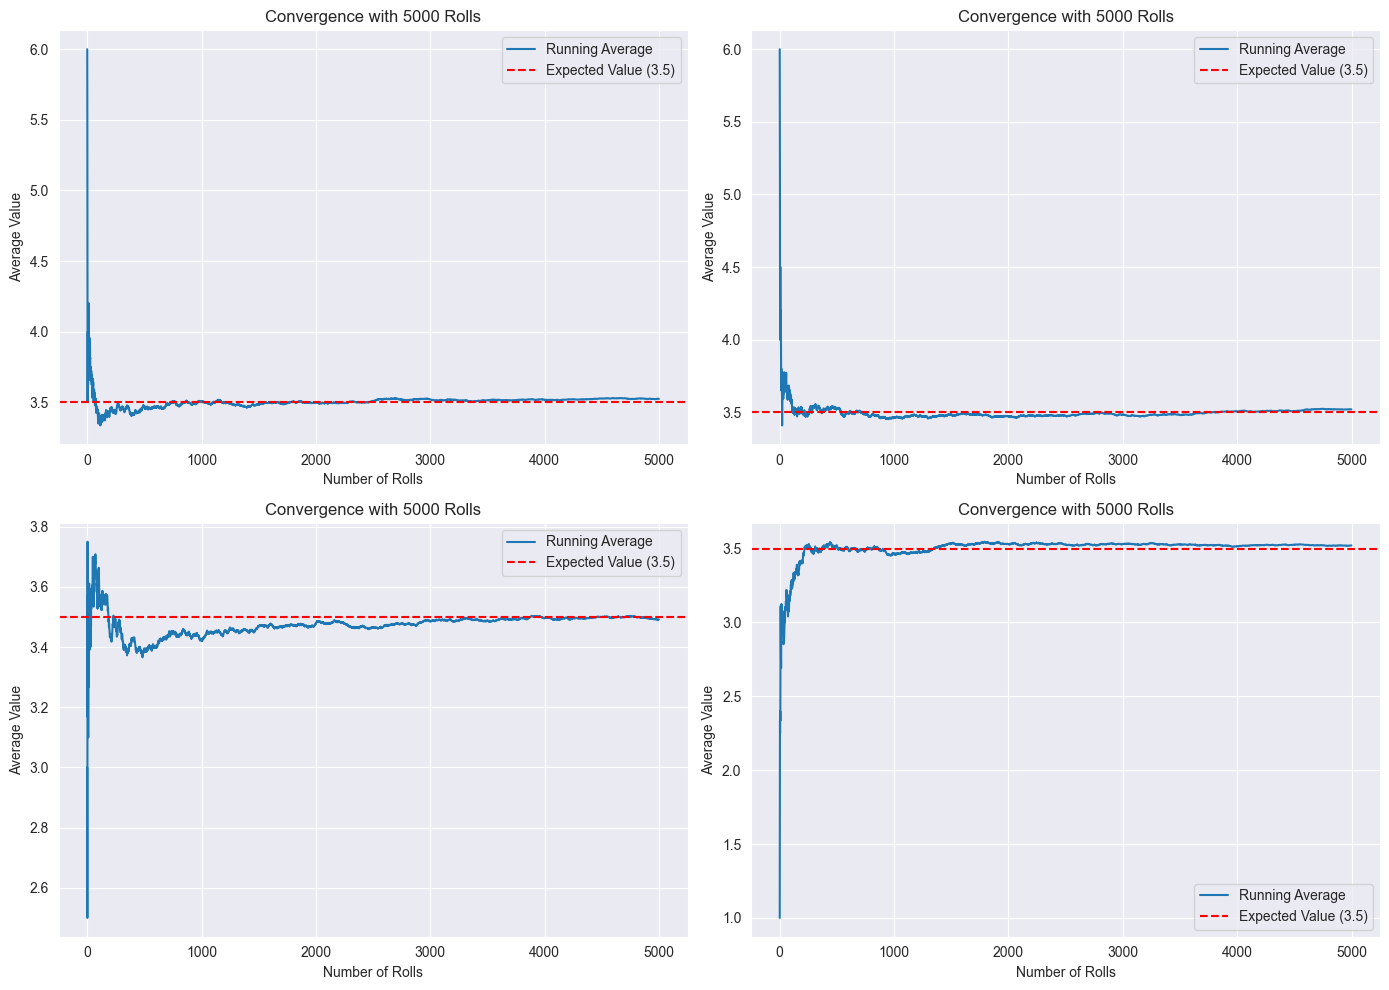

In [10]:
# Define the number of iterations for each subplot
iterations = [5000, 5000, 5000, 5000]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for each iteration count
for ax, n_rolls in zip(axs.flatten(), iterations):
    # Simulate rolling a six-sided die
    rolls = np.random.randint(1, 7, n_rolls)

    # Calculate running averages
    running_avg = np.cumsum(rolls) / np.arange(1, n_rolls + 1)

    # Plot the running averages
    ax.plot(running_avg, label='Running Average')
    ax.axhline(y=3.5, color='r', linestyle='--', label='Expected Value (3.5)')
    ax.set_xlabel('Number of Rolls')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Convergence with {n_rolls} Rolls')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show();

As can be seen there are fluctuations at the start, but it dampens down quite a bit as the number of trials increases, approaching the expected value of the random variable X. Another way of saying this is that the sample mean approaches the **population** mean, which is the mean of the data population (data coming from the true data distribution). Furthermore, the reason the fluctuations are so big at the start is because the variance is simply high. One can show that if the samples are drawn from i.i.d r.v and given the r.v or r.vs have $\sigma^2$ as variance, then the variance of the sample mean is 

$$var(\bar{X}) = var(\frac{1}{n}(X_1+...+X_n)) = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$$

so the variance ($\sigma^2$) of the sample mean decreases the larger n (number of trials and thus the number of data) is, which is reflected in the graph above. This explains the high variance at the start simply because n is low at the start.

Anyways, expressing the expectation of a random variable X as the population mean is quite apt, but in reality we usually do not have access to this data and so the best thing is to gather alot of samples of it and take the sample mean instead and hope you get close to the population mean.
Another way is if we find the pdf/pmf that can approximate it quite well, then it's easier to use common probability distributions instead, as they have well known properties that can make expectation among other things easier to calculate. For instance, the expectation of a normal distribution is just the mean of the normal distribution.

However, I should say when working theoretically with expectation **I don't think much about this interpretation** shown in the plots above, I just use the formulas and treat it as a **weighted sum** (weighted average is what they usually say, but I like to think of it as a weighted sum, weighted by the probability distribution of the data). The entire **point** of showing this is to give intuition as to why people talk about the mean when talking about the expectation and the connection between the two. Additionally, this hopefully can serve to give some kind of interpretation of expectation other than it being a weighted sum. The **conclusion** of this expectation experiment is that the sample mean converges with high probability (according to the law of large numbers) to the population mean i.e. the expected value when the number of samples goes to infinity. The general rule of thumb, although it's not guaranteed, is that as the number of samples increases the sample mean will approach the expected value essentially approximating it. But so this is the reason why people refer to the mean when talking about the expectation; it is the **long-running mean** of the data or in another word the mean of the true data.

## 6 Law of large numbers
Now we can finally talk about the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). There are two variants of this law, weak law and the strong law. Briefly the difference between them is the convergence in probability, the weak law refers to a "regular" convergence, whereas the strong law refers to [almost sure convergence](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Almost_sure_convergence), which is stronger. I will only go through the weak law of large numbers, as the stronger needs more advanced math, but I think the weak still illustrates the point.

The weak variant is defined as, given n number of i.i.d random variables with all the same expected value of $\mu$ and the sample mean of them is $\bar{X} = \frac{1}{n}(X_1 + ... + X_n)$ then the weak law of large numbers says

$$\lim_{n \to \infty} P\left(|\bar{X}_n - \mu| < \epsilon \right) = 1$$

for any $\epsilon > 0$. This means that there's a very high probability that the sample mean gets closer and closer to the population mean $E[\bar{X}] = \mu$ within any margin $\epsilon > 0$ as n grows to infinity. Remember that this definition is in the limit, meaning that it describes the behavior of the relation $|\bar{X}_n - \mu| < \epsilon$ in the limit as $n \to \infty$, and it's not saying that it's 100% guaranteed that it becomes exactly like the population mean. Rather it's saying that it's highly likely that it approaches the population mean. 

**List of misconceptions about law of large numbers**
Additionally, I think it's good to include some notes about common misconceptions regarding the law of large numbers
* LLN only applies to the sample mean and not to individual samples. This means that individual samples can vary alot (high variance), even though the variance of the sample mean in its entirety decreases as n grows (if there are no correlation between the samples). This should dispel any [gambler's fallacy](https://en.wikipedia.org/wiki/Gambler's_fallacy) that one might have about LLN. Past samples do not affect future samples at all because the samples are drawn from i.i.d r.v. So no other outcomes will be more or less likely because of past samples.
* LLN does not give any information about the convergence rate, which varies depending on the inherent variance in the distribution.
* LLN does not apply to dependent r.v
* LLN on small sample sizes **may not** exhibit the behavior of LLN as it's more focused on large sample sizes
* LLN implies probabilistic convergence, not absolute certainty. It states that the sample mean converges to the expected value with high probability as the number of trials goes to infinity, but does not guarantee exact results in finite samples.
* LLN is often confused with the ["law of averages"](https://en.wikipedia.org/wiki/Law_of_averages), which suggests that outcomes will "even out" in the short term. The "law of averages" is not a formal statistical law. The LLN addresses long-term averages over many trials, not short-term balancing of outcomes.

If it's still unclear as to what law of large numbers is you can take a look at this intro video [here](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/expected-value-lib/v/law-of-large-numbers) by Khan. He also addresses the problem of the misconception of short-term balancing of outcomes, and the simple answer to that is because they are all samples from i.i.d r.v. 

However, it's worth mentioning that in practice if the variance of the data is not high, then even small number of samples can make an OK approximation to the true mean of the data.

**Frequency converges to true distribution - Borel's law of large numbers**
From the 3 coin flips at a time experiment at the beginning of this notebook, we could observe that the frequency of the samples aligned with the true probability distribution as the number of trials n grew larger. In particular, I'm talking about the frequencies of the type of samples (for instance frequency of 0 heads, 1 heads, 2 heads, 3 heads from coin flip of 3 coins at the same time). I will admit that I do not have a proof of this observation, but I have a possible explanation that might hopefully shed some light. Imagine you have n trials meaning n samples from an i.i.d r.v or from n different i.i.d r.vs, which is the same thing in this case, then as already stated the sample mean will converge to the population mean i.e. the expected value of the random variable/variables as n moves to infinity. Let's call the true data A and the sampled dataset (sampled from A) B, and we have done n trials. Then the expected value of the true data is $E[A] = \mu_A = \frac{a_1+...+a_n}{n}$, while the sample mean of B is $\bar{B} = \frac{b_1+...+b_n}{n}$. Now comes the intuition, in order for the sample mean to be as similar to the population mean as possible one way to do this is to match the frequencies of the different sample values with the true data A by just setting the values to the same, then the frequencies (number of occurrences) at which the different types of values of the samples occurs will also be the same. Since this matches the true data we will also match the true frequencies and thus the true probability distribution. A critique to this is that you might be able to achieve the same thing with different number of frequencies for the different types of samples, so it doesn't guarantee that they need to be the same, but the point is as the number of samples grows to infinity, the frequencies will match more and more. However, this is still not a proof of this, but luckily there is a theory for this phenomenon called [Borel's law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers#Borel's_law_of_large_numbers) that states the following

> If an experiment is repeated a large number of times, independently under identical conditions, then the proportion of times that any specified event is expected to occur approximately equals the probability of the event's occurrence on any particular trial; the larger the number of repetitions, the better the approximation tends to be. More precisely, if E denotes the event in question, p its probability of occurrence, and $N_n(E)$ the number of times E occurs in the first n trials, then with probability one
 $$\frac{N_n(E)}{n} \to p \ \text{as} \ n \to \infty$$

As can be seen the frequencies here converges to the true probability distribution when n grows to infinity, which is what we suspected when we first looked at the coin flipping example.

## 7 Monte Carlo sampling
At this point you might be wondering why cover law of large numbers? I did it to sort of kill two birds with one stone, to give an intuition for expectation and how it relates to the mean and to cover a specific type of monte carlo sampling. This is because monte carlo sampling is used in both VAE and diffusion models (monte carlo estimate of the reconstruction term, just like in VAE) and is quite common to use in situations where a solution doesn't have an analytic form or if computing the solution is intractable. I don't fully understand the entire use of monte carlo in diffusion models, but I will present the monte carlo technique that they used in the paper to approximate the expected value of a r.v. Monte carlo methods are a class of computational algorithms that estimate solution to problems by repeated sampling.

Let's assume we have the following expectation expression that doesn't have an analytical solution, meaning we can't directly compute it.

$$E_p[f] = \int f(z)p(z) \,dz$$

The expression constitutes the expected value of a continuous function f(z) that is distributed by the probability distribution p(z). Because we assumed for discussion's sake that the expression doesn't have an analytical form we can use monte carlo method to approximate it instead. This is simply done by sampling from the distribution p(z) and calculating the mean of the samples, where L is our hyperparameter.

$$\bar{f} = \frac{1}{L}\sum_{l=1}^{L}f(z^l)$$

[Bishop](https://www.bishopbook.com/) shows that the expected value of this sample mean is exactly the expected value of the true function f, meaning it's an unbiased estimator $E[\bar{f}] = E[f]$ which means they have the same mean. This can be easily shown by

$$
\begin{align}
E[\bar{f}] 
&= E\left[ \frac{1}{L}\sum_{l=1}{L}f(z^l) \right] \\
&= \frac{1}{L}\sum_{l=1}^{L} E[f(z^l)] \\
&= \{\text{E is over the same distribution as f, i.e. p(z)}\} \\
&= \frac{1}{L}\sum_{l=1}^{L} E[f(z)] \\
&= \{\text{E is over the same distribution, so it will be a constant under summation}\} \\
&= \frac{1}{L} \cdot L \cdot E[f(z)] \\
&= E[f(z)]
\end{align}
$$

However, I find this not so instructive because if the samples are drawn from the true distribution then the expected value of the sample mean should naturally be the same as the expected value of the function f.
The variance of the sample mean is however interesting

$$
\begin{align}
var[\bar{f}] 
&= \frac{1}{L^2}\sum_l^L var[f(z^l)] \\
&= \{\text{variance is over the same distribution as f, i.e. p(z)}\} \\
&= \frac{1}{L^2}\sum_l^L var[f(z)] \\
&= \{\text{var is over the same distribution, so it will be a constant under summation}\} \\
&= \frac{1}{L^2} \cdot L \cdot var[f(z)] \\
&= \frac{1}{L} var[f(z)] \\
&= \{ \text{Apply} \ var(X) = E[(X - E[X])^2]\} \\
&= \frac{1}{L} E[(f - E[f])^2]
\end{align}
$$

which says that the variance decreases linearly with more samples and that this is completely independent of the dimensionality of the data. This shows that high accuracy might be achievable with relatively small number of samples according to Bishop.

Note that for both cases they are only valid if you have access to the true distribution, which you probably don't in most cases? In the diffusion case our distribution is only an approximate distributions I think, so there is bound to be some bias introduced. This makes the law of large numbers more important, because increasing it will generally move it closer to the true mean if the bias doesn't go bananas. If it does, there are other monte carlo methods that can help in tackling it such as [importance sampling](https://en.wikipedia.org/wiki/Importance_sampling), which is used to study a distribution while having samples generated from another distribution, in our case an approximated distribution to the true distribution. But I don't think I've seen importance sampling being used in the diffusion model, so I will skip the details of it. 

**Simple monte carlo sampling example**
Now moving on to a simple example of monte carlo sampling. We sample 100 times from a uniform distribution with values [0,1]. Then input those into the function f, which is our true function, and then take the mean of this.

In [11]:
# Number of samples
L = 100

# Function to estimate
def f(x):
    return x**2

# Generate samples uniformly from [0, 1]
samples = np.random.uniform(0, 1, L)

# Calculate the Monte Carlo estimate
estimate = np.mean([f(x) for x in samples])

print(f"Monte Carlo estimate: {estimate}")

Monte Carlo estimate: 0.32942992034639956


The true expected value is 
$$E[f(x)] = \int_0^1 x^2 \,dx = \frac{1}{3}[x^3]_0^1 = \frac{1}{3}(1 - 0) = \frac{1}{3}$$

This shows that even for small samples sometimes the monte carlo estimates can still give an adequate approximation to the true expected value, that is if you have access to the true distribution.

## 8 Normalization
Normalization actually has alot of different meanings depending on what context. For instance in statistics it can mean alot of [things](https://en.wikipedia.org/wiki/Normalization_(statistics)#:~:text=In%20statistics%20and%20applications%20of,scale%2C%20often%20prior%20to%20averaging.). In this case I mean to make the distribution or data sum to one. We also encounter this in softmax that turns logits (model output scores before the conversion) into probabilities. The simple idea is this

$$\frac{data}{\sum \text{data}}$$

So we just divide the data by the sum of the data. A natural question is why the sum of the data? Think about it, if you want the sum of the data to sum up to 1, but it's currently not doing it, and we can achieve this by scaling it, then what should we scale it with? If we denote our data $D=\{d_1, ..., d_n\}$ we have

$$\frac{\sum D}{?} = 1$$

What can we replace the question mark with to achieve a ratio of 1? Well it should simply be by the same value $\sum D$ because clearly 

$$\frac{\sum D}{\sum D} = 1$$

If we do some simple algebraic manipulation we can make it clearer what happens once we sum the normalized data

$$\frac{\sum D}{\sum D} = \sum \frac{D}{\sum D} = \frac{d_1}{\sum D} + ... + \frac{d_n}{\sum D} = \frac{\sum D}{\sum D} = 1$$

Now the middle is the interesting part, if we do not sum the normalized data we have

$$\frac{D}{\sum D} = \left\{ \frac{d_1}{\sum D}, ..., \frac{d_n}{\sum D} \right\}$$

And this is just the normalized data, which is what we showed at the very beginning of this section. Hopefully this makes it clearer why we divide the data by the sum of the data, it's a simple trick to make it sum to 1.

Just to show that this isn't bullshit I will provide a simple example. Let data $D=\{1,2,3,4,5,6,7,8,9,10\}$ and we want to normalize this data to sum to one. Then following the formula we get this code

In [12]:
D = np.arange(10) + 1
D_sum = np.sum(D)
normalized_D = D / D_sum 

assert np.sum(normalized_D) == 1

print(f"Unormalized data: {D}")
print(f"The sum of the data: {D_sum}")
print(f"Normalized data: {normalized_D}")
print(f"Sum of normalized data: {np.sum(normalized_D)}")


Unormalized data: [ 1  2  3  4  5  6  7  8  9 10]
The sum of the data: 55
Normalized data: [0.01818182 0.03636364 0.05454545 0.07272727 0.09090909 0.10909091
 0.12727273 0.14545455 0.16363636 0.18181818]
Sum of normalized data: 1.0


## 9 Expectation variance std
I'm just presenting interpretations, definitions and useful relations to know, although these are obviously not exhaustive.

**Interpretations**
* Expectation = true mean of data
* Variance = measure on how much data varies, specifically how much on average they deviate from the true mean of the data. However mathematically, this deviation or difference is squared.
* Standard deviation = like variance but square rooted making it expressed in the same unit as the data, so it's more interpretable

**Definitions**
* Expectation: $E[X] = \sum_i P(x_i) \cdot x_i$ discrete. $E[X] = \int P(x_i) \cdot x_i \,dx$ continuous.
* Variance: $Var[X] = E[(X-E[X])^2] = E[X^2] - E[X]^2$. $Var[X] = \sum_i P(x_i) \cdot (x_i - E[X])^2$ if discrete and $Var[X] = \int_\mathbb{R} (x-E[X])^2 \cdot f(x) \,dx = \int_\mathbb{R} x^2 \cdot f(x) \,dx - E[X]^2$ if continuous. As can be seen variance has different forms.
* Standard derivation: $std = \sqrt{Var[X]}$. Same as variance except you take the squared root of everything.


**Useful relations**
\
Expectation
* $E[X+Y] = E[X] + E[Y]$
* $E[aX] = aE[X]$
* $f(E[X]) \leq E[f(X)]$ Application of [Jensen's inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality), given that f is a [convex function](https://en.wikipedia.org/wiki/Convex_function)
* $E[aX + b] = aE[X] + b$. This is linear transformation of X
* $E[\sum_i^n a_iX_i + b] = \sum_i^n a_iE[X_i] + b$. This is linear combination of X
* $E[\sum_i^n X_i] = nE[X_i]$, where we can pick any i. This is under the assumption that all the r.v have the same mean
* Given $\bar{X} = \sum_i^n \frac{X_i}{n}$ then $E[\bar{X}] = \mu$, assuming the r.v are independent and each have mean $\mu$
* $E[XY] = Cov[X,Y] + E[X]E[Y]$, if X and Y are dependent variables. This is straight from the definition of covariance
* $E[XY] = E[X]E[Y]$, if X and Y are independent

\
Variance
* $Var[X] \geq 0$
* $Var[a] = 0$, where a is a constant. This means that $Var[X + a] = Var[X]$
* $Var[aX] = a^2Var[X]$, this one I've used alot of times, real handy
* $Var[aX+bY] = a^2Var[X] + b^2Var[X] + 2abCov[X,Y]$, where a,b are constants and cov the covariance. I will cover it in the next section
* $Var[aX-bY] = a^2Var[X] + b^2Var[X] - 2abCov[X,Y]$
* $Var[\sum_i^n X_i] = \sum_{i,j=1}^n Cov[X_i, X_j] = \sum_i^n Var[X_i] + 2 \sum_{i \neq j} Cov[X_i,X_j]$ in general for n r.v. This is the variance for a sum of r.v
* $Var[\sum_i^n a_iX_i] = \sum_{i,j=1}^n a_ia_jCov[X_i, X_j] = \sum_i^n a_i^2 Var[X_i] + \sum_{i \neq j} a_ia_jCov[X_i,X_j] = \sum_i^n a_i^2 Var[X_i] + 2 \sum_{0 \leq i < j \leq n} a_ia_jCov[X_i,X_j]$, this is for a linear combination of a r.v
* $Var[\sum_i^n X_i] = \sum_i^n Var[X_i]$, if all $X_i$ are uncorrelated meaning the Cov is zero for all pairs of $X_i$, then the variance of the sum of r.v reduces to the sum of the variance of each r.v
* $Var[X+Y] = Var[X] + Var[Y] + 2Cov(X,Y)$ in general for r.v X and Y if there is some covariance between X and Y
* $Var[X+Y] = Var[X] + Var[Y]$, if X and Y are uncorrelated
* $Var[XY] = E[X^2]E[Y^2] - E[X]^2E[Y]^2$, if X and Y are independent

For std it's the same as variance, just square root over everything.

We now show a simple example of standard deviation and mean to understand how it relates to the mean. It's easier to show the relation between standard deviation and the data instead of the variance and the data, because they are both in the same unit, while the variance squares the difference, which scales the values up compared to the data. The standard deviation takes the square root of all, so it scales it back down.

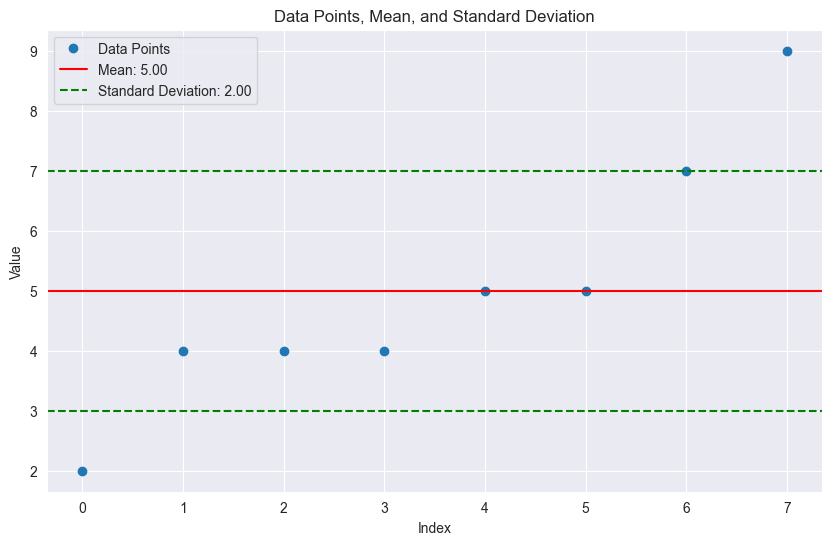

In [13]:
# Sample data
data = [2, 4, 4, 4, 5, 5, 7, 9]

# Calculate mean
mean = np.mean(data)

# Calculate variance
variance = np.var(data)

# Calculate standard deviation
std_dev = np.std(data)

# Print the results
mean, variance, std_dev

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data points
plt.plot(data, 'o', label='Data Points')

# Plot mean line
plt.axhline(y=mean, color='r', linestyle='-', label=f'Mean: {mean:.2f}')

# Plot standard deviation lines
plt.axhline(y=mean + std_dev, color='g', linestyle='--', label=f'Standard Deviation: {std_dev:.2f}')
plt.axhline(y=mean - std_dev, color='g', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Points, Mean, and Standard Deviation')
plt.legend()

# Show plot
plt.show();

The red line is the mean of the data and the green is the standard deviation, i.e. how much the data deviates from the mean on average. In this case it seems to be $\text{mean} \pm 2$.
Now on to another example to show what is meant by different degrees of standard deviations

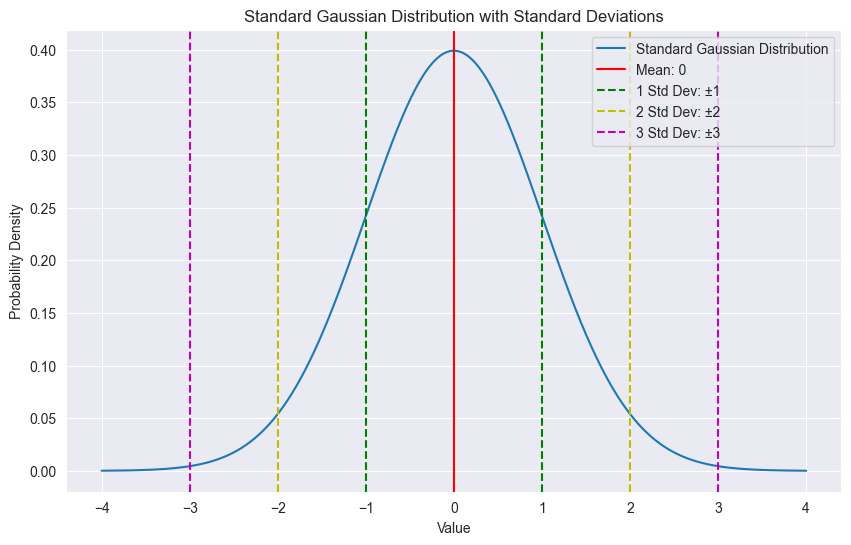

In [14]:
# Generate x values
x = np.linspace(-4, 4, 1000)

# Compute the corresponding y values using the normal distribution PDF
y = norm.pdf(x, 0, 1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the normal distribution curve
plt.plot(x, y, label='Standard Gaussian Distribution')

# Plot mean line
plt.axvline(x=0, color='r', linestyle='-', label='Mean: 0')

# Plot standard deviation lines
std_dev = 1
plt.axvline(x=std_dev, color='g', linestyle='--', label=f'1 Std Dev: ±{std_dev}')
plt.axvline(x=-std_dev, color='g', linestyle='--')

plt.axvline(x=2*std_dev, color='y', linestyle='--', label=f'2 Std Dev: ±{2*std_dev}')
plt.axvline(x=-2*std_dev, color='y', linestyle='--')

plt.axvline(x=3*std_dev, color='m', linestyle='--', label=f'3 Std Dev: ±{3*std_dev}')
plt.axvline(x=-3*std_dev, color='m', linestyle='--')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Standard Gaussian Distribution with Standard Deviations')
plt.legend()

# Show plot
plt.show();

This is a standard gaussian with zero mean and unit variance meaning unit std as well. Here I've shown how the std relates to the mean for different degrees, 1std, 2std and 3std, which is just the same thing as 1 * std, 2 * std, 3 * std. This is what is referred to when people say for instance that something is within n standard deviations of the mean. If someone said the probability of an event happening is within the first standard deviation of the mean, then that would mean the probability is the sum of the probability concentrations between -1 and 1 in the image, and because we are working with continuous values this would be calculated by taking the integral between these two intervals [-1, 1] where the integrand (the function to integrate over) is the standard gaussian distribution. Also, because the std is 1 the gap between each std "level" is just 1. Note that **I think**, not sure, but I think that it only makes sense to talk about different levels of std when you are working with a gaussian, because of its properties it has a nice easy interpretation. 

## 10 Covariance and correlation
**Definitions**
* Covariance = $Cov[X,Y] = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$
* Correlation = $Corr[X,Y] = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_{X}\sigma_{Y}}$, where $\mu_X,\mu_Y$ is the expected value of X and Y and $\sigma_{X},\sigma_{Y}$ is the standard deviation of X and Y

**Interpretation**
* Covariance captures the **linear** relationship between two random variables X and Y. This is important to remember, because if there is a non-linear relationship between X and Y, then the result of covariance might be misleading. For instance if X is a r.v such that $E[X] = 0$ and $E[X^3] = 0$ and $Y = X^2$, then X and Y are related because if you know X then you know Y, but in a non-linear way. If we take the covariance of them $Cov[X,Y] = E[XY] - E[X]E[Y] = \{\text{we know that E[X] = 0 and Y=XX}\} = E[XX^2] - 0 \cdot E[Y] = E[X^3] = 0$ we get zero, which would have meant that they are independent, but clearly as we defined $Y=X^2$ they are dependent. So this shows that zero covariance does not imply independency between variables. However, if we know beforehand that two variables are independent, then we will always have zero covariance $Cov[X,Y] = E[XY] - E[X]E[Y] = \{\text{E[XY] = E[X]E[Y] if X and Y are independent}\} = E[X]E[Y]-E[X]E[Y] = 0$. Now how do we interpret the values of covariance? If we have a positive covariance then it means that they move together in the same direction, an increase in one results in an increase in the other, decrease in one results in decrease in the other. If the covariance is negative then an increase in one results in a decrease in the other and vice versa. If the covariance is zero, and we know that there's a linear relationship between the two variables then they are independent. If we however don't know the nature of their relationship beforehand, we can't say much.
* Correlation is similar to how std is to variance, it's supposed to be more interpretable by in this case normalizing the range of the covariance between $[-1,1]$. This eliminates problems when different units are used to compute the covariance, which will vary (comparing apples with oranges), so comparing covariances that are computed with different units once normalized will not pose a problem for correlation. For more information on this see [here](https://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance). The interpretation of positive, negative and zero correlation is the same as that of the covariance. 

**Useful properties**
\
Covariance
* Cov is symmetric meaning $Cov[X,Y] = Cov[Y,X]$
* Cov with itself is just the variance. $Cov[X,X] = Var[X]$. So the variance is a **special case** of covariance, which is more general.
* $Cov[X,a] = 0$, where a is a constant
* $Cov[aX, bY] = abCov[X,Y]$
* $Cov[a+X, b+Y] = Cov[X,Y]$

I didn't seem to find any for correlation.

Anyway let's code some simple examples to visualize correlation since it's easier to interpret.

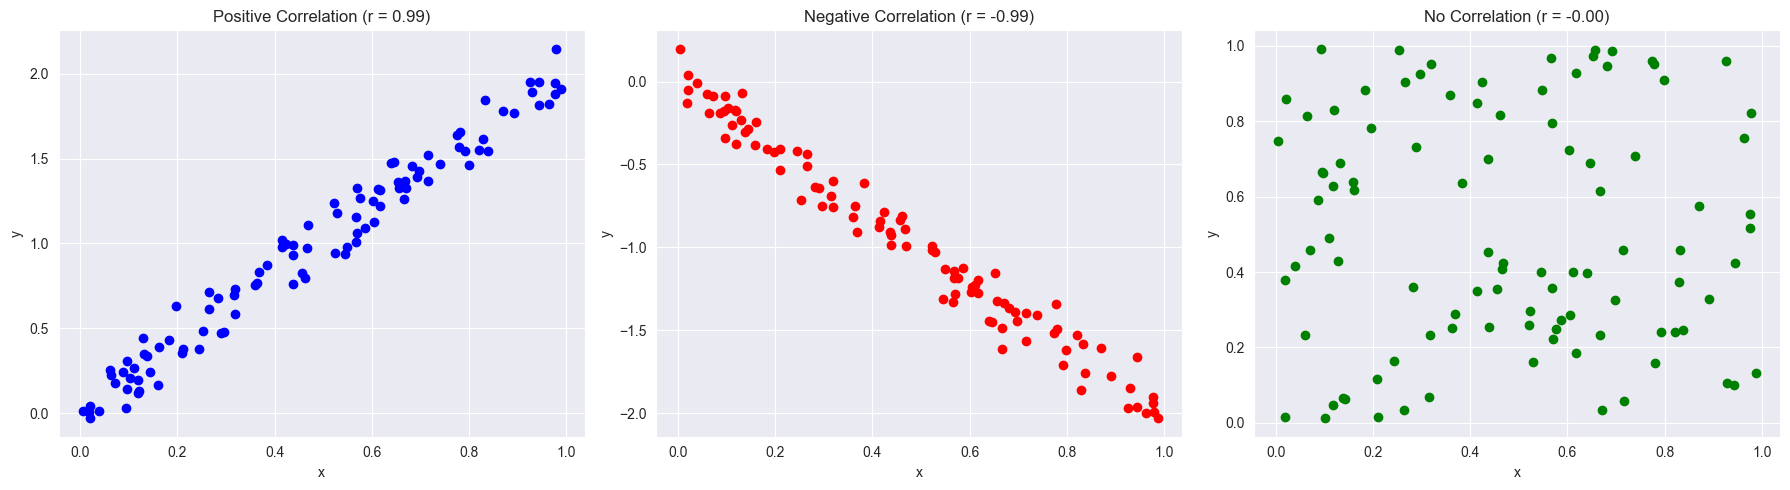

In [15]:
# Generate some example data
np.random.seed(0)
x = np.random.rand(100)
y_positive = 2 * x + np.random.normal(0, 0.1, 100)  # Positive correlation
y_negative = -2 * x + np.random.normal(0, 0.1, 100) # Negative correlation
y_no_correlation = np.random.rand(100)              # No correlation

# Calculate correlation coefficients
corr_positive, _ = pearsonr(x, y_positive)
corr_negative, _ = pearsonr(x, y_negative)
corr_none, _ = pearsonr(x, y_no_correlation)

# Plot the data
plt.figure(figsize=(18, 5))

# Positive correlation
plt.subplot(1, 3, 1)
plt.scatter(x, y_positive, color='b')
plt.title(f'Positive Correlation (r = {corr_positive:.2f})')
plt.xlabel('x')
plt.ylabel('y')

# Negative correlation
plt.subplot(1, 3, 2)
plt.scatter(x, y_negative, color='r')
plt.title(f'Negative Correlation (r = {corr_negative:.2f})')
plt.xlabel('x')
plt.ylabel('y')

# No correlation
plt.subplot(1, 3, 3)
plt.scatter(x, y_no_correlation, color='g')
plt.title(f'No Correlation (r = {corr_none:.2f})')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show();

As can be seen in the first plot, where we have a positive correlation as the x values increases the y values also increases and vice versa. For the negative correlation as the x values increases the y values decreases and vice versa. For the zero correlation it suggests that there is no linear relationship between the variables (we randomly sampled from a pseudo-random generator), but there might be non-linear relationship that the correlation is not able to pick up, because it can only show linear relationships.

## 11 Random vectors
Then comes the question, how do you work with variance, expectation, covariance if they are vectors or matrices? In general a random vector X looks like this

$$
\begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
\end{align}
$$

and for a random matrix we have

$$
\begin{align}
X &= 
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm}
\end{pmatrix}
\end{align}
$$

The elements in the vector or matrix are each a random variable and they do not have to be from the same distribution or even independent. Taking the expectation of X of both is the same as taking the expectation element-wise. Furthermore, linearity of expectation for random vectors and matrices also works as in the normal case. That is if you have $$Y = AX + b$$ then the expectation of this is

$$E[Y] = aE[X]+b$$

Now on to covariance matrix. Covariance matrix off-diagonals just denotes the covariances between the pairwise r.vs, while the diagonal denotes the variance of the r.vs. To see this I will show a simple example of deriving the covariance matrix starting from taking the variance of the random vectors X and Y.

$$
\begin{align}
Var[X,Y] &= \{\text{Use the formula}\  Var[X,Y] = E[(X - \mu_X)(Y-\mu_Y)]\} \\
&= E[(X-\mu_X)(Y-\mu_Y)^T] \\
&= \{\text{Outer product}\} \\
&= E\left[ 
\begin{bmatrix}
           x_{1} - \mu_{x1} \\
           \vdots \\
           x_{n} - \mu_{xn}
\end{bmatrix}
[y_1 - \mu_{y1}, ..., y_n - \mu_{yn})] \right] \\
&= 
E \begin{pmatrix}
(x_{1} - \mu_{x1})^2 & (x_{1} - \mu_{x1})(y_{2} - \mu_{y2}) & \cdots & (x_{1} - \mu_{x1})(y_{n} - \mu_{yn}) \\
\vdots & \vdots & \ddots & \vdots \\
(x_{n} - \mu_{xn})(y_{1} - \mu_{y1}) & (x_{n} - \mu_{xn})(y_{2} - \mu_{y2}) & \cdots & (x_{n} - \mu_{xn})^2 \\
\end{pmatrix} \\
&= \{\text{Apply E element-wise and notice that we get the definition of covariance on off-diagonals and variance on diagonals}\} \\
&= 
E \begin{pmatrix}
Var[x_1] & Cov[x_1,y_2] & \cdots & Cov[x_1, y_n] \\
\vdots & \vdots & \ddots & \vdots \\
Cov[x_n, y_1] & Cov[x_n, y_2] & \cdots & Var[x_n] \\
\end{pmatrix} \\
&= Cov(X,Y)
\end{align}
$$

## 12 Joint marginal conditional probability
Out of all these the joint is the most useful one, because you can get the marginal and conditional probability from it.

\
**Definitions**
* Joint: $P(X,Y)$ or $P(a,b)$, where X and Y are r.v and a and b are events. $P(a|b) * P(b)$ = $P(b|a) * P(a)$ = $P(a,b)$
* Marginal: $P(X)$, $P(Y)$ or $P(a)$, $P(b)$. $\sum_{b \in B} P(a,b) = P(a)$ for discrete values and $\int P(a,b) \,db$ for continuous
* Conditional: $P(X|Y)$, $P(Y|X)$, $P(a|b)$. $P(b|a)$. $P(a|b) = \frac{P(a,b)}{P(b)}$ or $P(b|a) = \frac{P(a,b)}{P(a)}$

\
**Interpretation**
* Joint $P(X,Y)$ just means the probability of both of them occurring at the same time. For events it's more intuitive, $P(a,b)$ means the probability of event a and event b occurring at the same time.
* Marginal $P(X)$ just means the probability of X, again for events it's more intuitive $P(a)$ is the probability of event a occurring
* Conditional $P(X|Y)$ and once again for events we have $P(a|b)$ which means probability of a given b. For these cases it means that there is a dependence between event a and b, and therefore we have to resort to conditional probability, because once event b has occurred that will affect the probability of a, which is captured by $P(a|b)$. One way I think about conditional probability is interpreting it as the proportions of the joint of event a and b occurring out of all the possible outcomes of event b, then that will be the conditional of event a given that b has happened. This also makes it perfectly clear why using the conditional in this computation gives back the joint $P(a,b) = P(a|b)*P(b) = P(b|a)P(a)$. It's because the conditional probability is just a proportion of b, specifically the proportion of b where both a and b occurs. Therefore, multiplying this proportion with b should give you back exactly the probability of when both a and b occurs, which is just the joint probability.

I think it's easier to understand conditional probability by illustrating it visually with a [venn diagram](https://en.wikipedia.org/wiki/Venn_diagram). This also shows how to interpret marginal and joint probability visually. The joint here is the intersection between event a and b and marginal is just the entire bubble for respective event.

![](assets/cond_prob_prop.png)

Once again, a and b are events in this image, and we want to calculate the conditional probability $P(a|b)$ that is the conditional probability of event a given that event b has occurred.
Using the venn diagram visualization one way to understand conditional probability $P(a|b)$ is that once we know event b has occurred then we must be moving in the sample space of b. Before anything had happened the sample space was $\Omega$, because that contained all possible outcomes, but once we knew that b occurred if we want to know what the probability of event a is given that b has occurred we must look at only the sample space of b. And the only parts of event a that intersects with event b is the red area. What the conditional probability $P(a|b)$ then denotes is the **proportion** of this red area (joint probability $P(a,b)$ of event a and b occurring at the same time) out of our new sample space b (the white area). Mathematically to compute this proportion, we take the joint $P(a,b)$ (red area) and divide it with our new sample space b $P(b)$ (white area), which gives us our desired conditional $P(a|b) = \frac{P(a,b)}{P(b)}$, and voila that's how the conditional is computed.

\
**Relations**
Here you can see how joint is needed for both marginal and conditional, showing its importance to compute these quantities.
* Joint = conditional * marginal = $P(a|b) * P(b)$ = $P(b|a) * P(a)$ = $P(a,b)$
* Marginal = sum or integrate joint => $\sum_{b \in B} P(a,b) = P(a)$ for discrete values and $\int P(a,b) \,db$ for continuous
* Conditional = joint divided by marginal => $P(a|b) = \frac{P(a,b)}{P(b)}$ or $P(b|a) = \frac{P(a,b)}{P(a)}$



I think the best way to understand these probabilities and their relation is by considering a joint and conditional probability table for discrete values.

\
The **joint probability** of two discrete r.v X and Y, where $X \in \{A,B\}$ and $Y \in \{1,2\}$.
$$
\begin{array}{c|cc|c}
P(X, Y) & Y=1 & Y=2 & \text{Total} \\
\hline
X=A & 0.2 & 0.3 & \textcolor{red}{0.5} \\
X=B & 0.3 & 0.2 & \textcolor{green}{0.5} \\
\hline
\text{Total} & \textcolor{blue}{0.5} & \textcolor{purple}{0.5} & 1.0 \\
\end{array}
$$

These are made up numbers for the joint probabilities, just to illustrate the relationship between joint, marginal and conditional probability. Each entry in this table constitutes a joint probability, for instance $P(X=A,Y=1) = 0.2$ in the table. The last column and the last row are marginal probabilities, which are created according to the formula by summing over the correct variables, while fixing the other variable. Notice that the marginals have to sum to 1. This process can be described by

$$
\text{For } X:
$$

$$
P(X=A) = P(A, 1) + P(A, 2) = 0.2 + 0.3 = \textcolor{red}{0.5}
$$

$$
P(X=B) = P(B, 1) + P(B, 2) = 0.3 + 0.2 = \textcolor{green}{0.5}
$$

$$
\text{For } Y:
$$

$$
P(Y=1) = P(A, 1) + P(B, 1) = 0.2 + 0.3 = \textcolor{blue}{0.5}
$$

$$
P(Y=2) = P(A, 2) + P(B, 2) = 0.3 + 0.2 = \textcolor{purple}{0.5}
$$

Now for the **conditional probability** table of the above

$$
\begin{array}{c|cc}
P(Y|X) & Y=1 & Y=2 \\
\hline
X=A & \textcolor{cyan}{0.4} & \textcolor{magenta}{0.6} \\
X=B & \textcolor{yellow}{0.6} & \textcolor{orange}{0.4} \\
\end{array}
$$

And the process to calculate this is by using the formula $P(a|b) = \frac{P(a,b)}{P(b)}$ and $P(b|a) = \frac{P(a,b)}{P(a)}$

$$
\text{For } X=A:
$$

$$
P(Y=1|X=A) = \frac{P(A, 1)}{P(A)} = \frac{0.2}{0.5} = \textcolor{cyan}{0.4}
$$

$$
P(Y=2|X=A) = \frac{P(A, 2)}{P(A)} = \frac{0.3}{0.5} = \textcolor{magenta}{0.6}
$$

$$
\text{For } X=B:
$$

$$
P(Y=1|X=B) = \frac{P(B, 1)}{P(B)} = \frac{0.3}{0.5} = \textcolor{yellow}{0.6}
$$

$$
P(Y=2|X=B) = \frac{P(B, 2)}{P(B)} = \frac{0.2}{0.5} =  \textcolor{orange}{0.4}
$$

So from this it's apparent that we could calculate all the marginals and conditional by just knowing the joint probabilities. Hopefully this shows not only the power of joint probability but also the relation between them. Note that the conditional probability table is for $P(Y|X)$, but we could have as easily created a table for $P(X|Y)$ by using the formula for conditional probability.

Above was for discrete values, for continuous it may seem a bit more abstract, but here's the code for the joint, conditional and marginal probabilities of standard gaussian distributions.

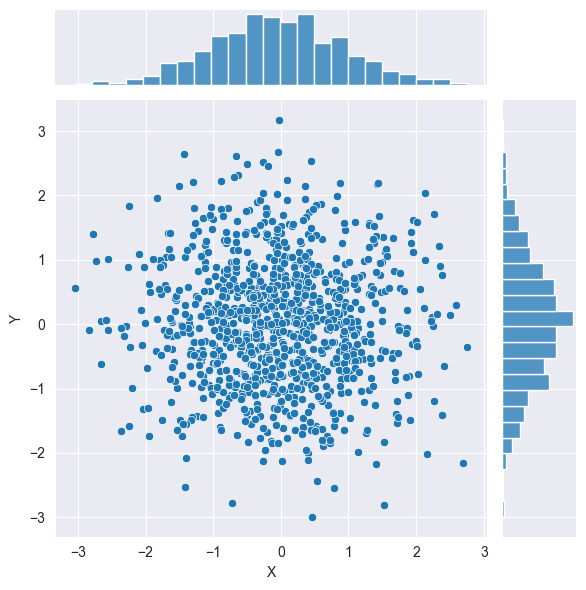

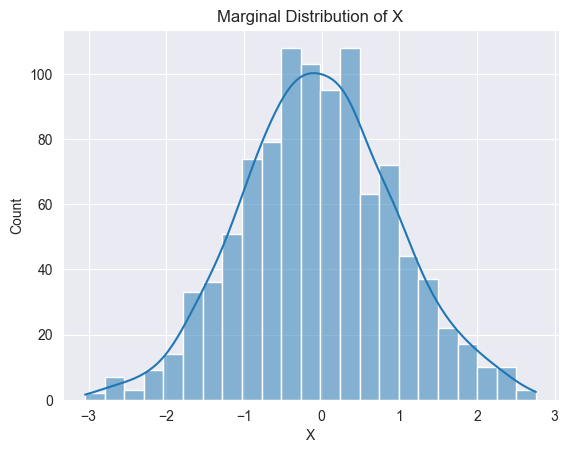

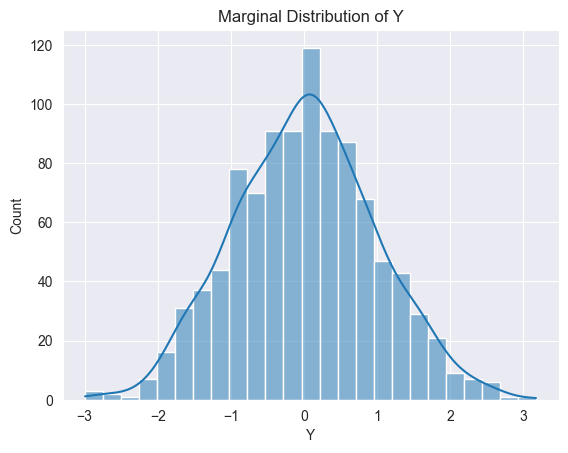

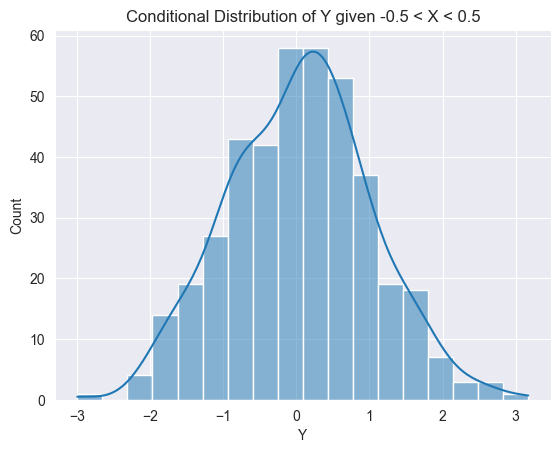

In [16]:
# Generate sample data
np.random.seed(0)
data = pd.DataFrame({
    'X': np.random.normal(0, 1, 1000),
    'Y': np.random.normal(0, 1, 1000)
})

# Joint distribution visualization
sns.jointplot(x='X', y='Y', data=data, kind='scatter')
plt.show()

# Marginal distributions
sns.histplot(data['X'], kde=True)
plt.title('Marginal Distribution of X')
plt.show()

sns.histplot(data['Y'], kde=True)
plt.title('Marginal Distribution of Y')
plt.show()

# Conditional distribution P(Y | X)
conditional_data = data[data['X'].between(-0.5, 0.5)]
sns.histplot(conditional_data['Y'], kde=True)
plt.title('Conditional Distribution of Y given -0.5 < X < 0.5')
plt.show();

It's common to see something like the very first picture for continuous joint probabilities. The histograms at the top and to the side are the marginal probabilities of X (top) and Y (right) respectively. The middle plot is the scatter plot of the samples from standard gaussian, it's not a probability. [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) is used to approximate a distribution for the histograms, which is approximately gaussian as can be seen. While it may seem a bit abstract the same formulas to calculate joint, conditional and marginal are used, so it's nothing special. The only difference is now the values are continuous, so integrals are used to sum things up, which can be a bit tricky depending on what distribution you are working with.

## 13 Law of total probability
As we stated earlier the total probability of all the events from the sample space $\Omega$ sums to 1 

$$\sum_i P(A_i) = 1$$

But there's an interesting fine-grained version of this when you only study a specific event that can be split into more sub-events, all summing up to the probability of event a. This is called the law of total probability and is defined for the discrete case as

$$P(A) = \sum_{i=1}^{n} P(A|H_i)P(H_i)$$
<p align="center"><img src="assets/total_probability.png" /></p>

where we have split the event A into n different mutually exclusive sub-events $H_i$ that all belongs to the sample space $H_i \in \Omega$ in fact they all together form the sample space $H_1 \cup ... \cup H_n = \Omega$. The continuous counterpart is

$$P(A) = \int_{-\infty}^{\infty}P(A|X=h)f_X(h)\,dh$$

where $f_X(x)$ is the probability density function of the r.v X.

P(A) = 0.38


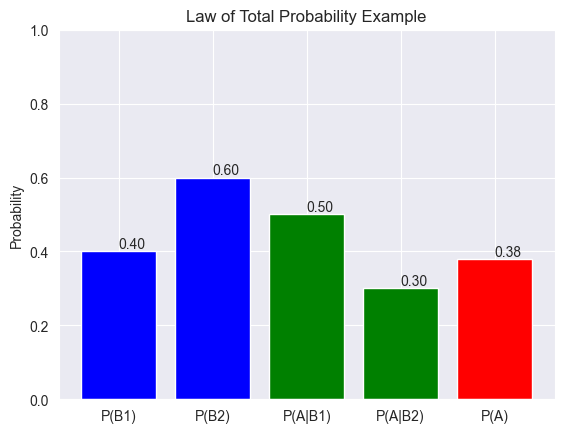

In [17]:
# Probabilities
P_B1 = 0.4
P_B2 = 0.6
P_A_given_B1 = 0.5
P_A_given_B2 = 0.3

# Calculate P(A) using the Law of Total Probability
P_A = P_A_given_B1 * P_B1 + P_A_given_B2 * P_B2

print(f"P(A) = {P_A:.2f}")

# Visualization using a bar chart
labels = ['P(B1)', 'P(B2)', 'P(A|B1)', 'P(A|B2)', 'P(A)']
values = [P_B1, P_B2, P_A_given_B1, P_A_given_B2, P_A]

fig, ax = plt.subplots()

bars = plt.bar(labels, values, color=['blue', 'blue', 'green', 'green', 'red'])

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')

plt.title('Law of Total Probability Example')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show();

Here B1 and B2 are mutually exclusive events and sum to 1. Using the formula of law of total probability for the discrete case

$$P(A) = P(A|B1)P(B1) + P(A|B2)P(B2)$$

I will visualize the events with my awesome handdrawing skills (sarcasm)

![](assets/law_of_total_prob.png)

## 14 Bayes theorem
Baye's theorem has many interpretations and is one of the things in math that can seem confusing at first. There's alot to say about baye's theorem, I will only cover the very basics, but read [here](https://en.wikipedia.org/wiki/Bayes%27_theorem) if you are curious. Also, 3blue1brown has an excellent [video](https://www.youtube.com/watch?v=HZGCoVF3YvM&t=48s) about baye's theorem that gives a nice framework of how to think bayesian. Anyway, let's start with the definition for discrete case

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A,B)}{P(B)} = \frac{P(B|A)P(A)}{\sum_{a \in A}P(B, a)} \implies P(\textcolor{red}{H}|\textcolor{blue}{E}) = \frac{\textcolor{green}{P(E|H)}\textcolor{orange}{P(H)}}{P(\textcolor{blue}{E})}$$

I've written the last expression as you would normally encounter baye's theorem when googling it. Although it does seem very similar to conditional probability, baye's theorem emphasizes each part of conditional probability, so much so that they all have special names. Note that for the marginal evidence in the case of continuous values switch the sum out for integral.
* $\textcolor{blue}{E}$ = evidence, the marginalization over all possible parameters in DL setting where evidence is true. The E is usually the data in DL.
* $\textcolor{red}{H}$ = hypothesis, would be the parameters in a DL setting
* $\textcolor{green}{P(E|H)}$ = likelihood, just a function based on the parameters usually in DL setting, here H would be parameters. This is not a valid probability distribution, as it doesn't sum to 1.
* $\textcolor{orange}{P(H)}$ = prior, usually some prior knowledge about the task you are working with. This serves to ground the probability in reality if it's reflective of reality or an adequate approximation of it. MLE treats this as 1, so it doesn't affect the likelihood.
* $P(H|E)$ = this is called the posterior, which is the conditional of H given that E has occurred/is true.

Essentially what baye's is saying is to look at all the cases where the evidence is true and then to consider the **proportions** of the cases where the hypothesis is also true, that's it. Mathematically this is $\frac{P(H,E)}{P(E)}$. But this is also the essential insight about conditional probability in general. So if one understands conditional probability as a proportion then one can use that understanding on baye's theorem. However, baye's emphasizes another point of view that is actually the heart of it, which is that new $\textcolor{blue}{evidence}$ shouldn't determine your beliefs in a vacuum, it should update your prior belief. This is best illustrated with a simple example. 

\
**Healthcare example - updating prior belief**
\
Let's say a woman Alice goes to the doctor to scan for breast cancer. Here are the relevant made up stats to use for baye's theorem
* $P(c) = \frac{8}{1000}$ this is the occurrences of cancer in the world (made up number)
* $P(+|c) = 0.9$, given you have cancer there's a 90% chance that the scan will give positive result back
* $P(+|\neg c) = 0.07$, 7% chance to get positive result given you don't have cancer
* $P(\neg c) = 1-0.008 = 0.992$, to not have cancer in the world

We want to calculate $P(c|+)$, that is the probability of actually having cancer given a positive result. For this we can apply baye's theorem to flip the condition because we have all the components to compute it.

$$
\begin{align}
P(c|+) &= \frac{P(+|c)P(c)}{P(+)} \\
&= \{\text{Apply law of total probability on P(+) or marginalize P(+,c) over c, both are the same in this case}\} \\
&= \frac{P(+|c)P(c)}{P(+|c)P(c) + P(+|\neg c)P(\neg c)} \\
&= \{\text{We have the values for all the components, so substitute them into the equation}\} \\
&= \frac{0.9 \cdot \textcolor{orange}{0.008}}{0.9 \cdot \textcolor{orange}{0.008} + 0.07 \cdot 0.992} \\
&\approx 0.094 \\
&\approx 9\%
\end{align}
$$

This was a very typical example use case of bayes theorem, we wanted to calculate a posterior but didn't know how to calculate it directly, so we flipped the conditional instead and worked from there. This example shows there's a 9% chance of having cancer given that you receive a positive result from the scan. 

\
Now what happens if Alice goes for a second round, because she doesn't want to believe in the positive result that she got? Thinking intuitively about this, before getting a positive result she might not have had high beliefs in having cancer as the disease as portrayed in this specific toy example is not very prevalent 8/1000. But now that she got a positive result it would be natural for her beliefs to have changed, in fact believing more in that she might actually have cancer. Effectively what this does to baye's theorem is that the prior changes, her beliefs before getting a second round. Because the posterior $P(c|+)$, which can be described as $P(Hypothesis|Evidence)$ was 9%, it's natural then to set this as the new prior for our second round. This **ties** nicely together with what 3blue1brown said about the heart of baye's theorem, the presence of new evidence should not determine your belief in a vacuum, it should **update** it. So going back for a second round we get with our new prior of 0.094

$$
\begin{align}
P(c|+) &= \frac{P(+|c)P(c)}{P(+)} \\
&= \frac{P(+|c)P(c)}{P(+|c)P(c) + P(+|\neg c)P(\neg c)} \\
&= \{\text{our new prior is 0.094 and P(not cancer) is also updated to 1-0.094 = 0.906}\} \\
&= \frac{0.9 \cdot \textcolor{orange}{0.094}}{0.9 \cdot \textcolor{orange}{0.094} + 0.07 \cdot \textcolor{orange}{0.906}} \\
&\approx 0.572 \\
&\approx 57\%
\end{align}
$$

This means that there's now a 57% chance that she has breast cancer. This is significantly higher than the 9% at the beginning, but it may not be so surprising as we had about 10 times increase in the prior. So you can see that by incorporating the new belief into the computation we could get a new posterior that may reflect better the actual chance of breast cancer, that is if the new belief was accurate. **Speculation** But this should mimic how humans work with their beliefs, although in reality there are far more factors that can sway away from rational thinking such as personal biases, so people might not be as rational as one would like to think. Nevertheless, working bayesian gives a nice framework to reason probabilistically about problems by making uncertainties explicit (working directly with likelihood, prior and evidence to compute the posterior).

\
**How does prior affect the posterior?**
\
One last thing for this section concerns the influence of the components of baye's theorem. In general if you don't know the true prior, which can be hard to know initially, people usually start with a uniform prior and iteratively updates this with the posterior. From looking at the toy example above we could see that a dramatic increase in the prior gave a dramatic increase in the posterior. I initially thought it was interesting to check this with ChatGPT, but it just seemed to produce to me uninteresting results, perhaps only the prior is worth exploring, so I will include it here.

**Prior influence on posterior**

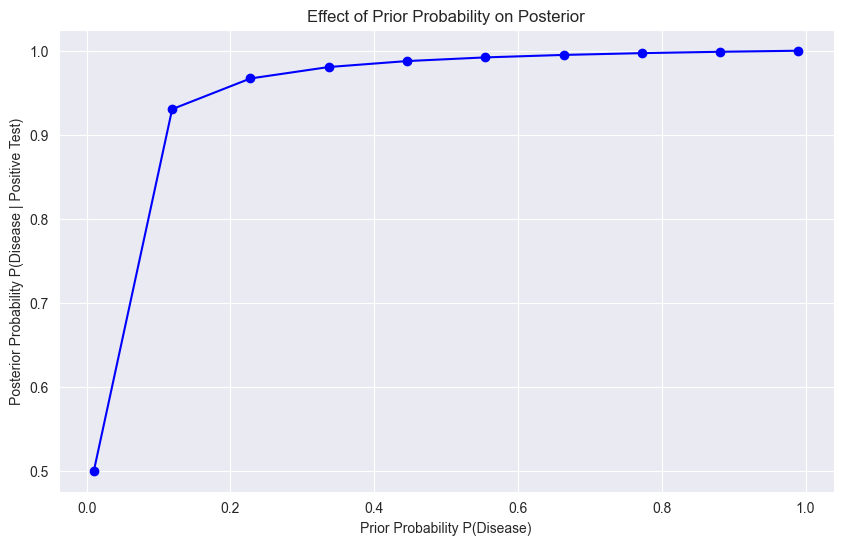

In [18]:
# Constants
P_Positive_given_Disease = 0.99  # P(+|disease), the likelihood
P_Positive_given_No_Disease = 0.01  # P(+|no disease)

# Function to compute P(Disease | Positive Test)
def compute_posterior(P_Disease, P_Positive_given_Disease, P_Positive_given_No_Disease):
    P_No_Disease = 1 - P_Disease
    P_Positive = (P_Positive_given_Disease * P_Disease) + (P_Positive_given_No_Disease * P_No_Disease)
    P_Disease_given_Positive = (P_Positive_given_Disease * P_Disease) / P_Positive
    return P_Disease_given_Positive

# Varying prior probabilities
priors = np.linspace(0.01, 0.99, 10)
posteriors = [compute_posterior(p, P_Positive_given_Disease, P_Positive_given_No_Disease) for p in priors]

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(priors, posteriors, marker='o', linestyle='-', color='b')
plt.xlabel('Prior Probability P(Disease)')
plt.ylabel('Posterior Probability P(Disease | Positive Test)')
plt.title('Effect of Prior Probability on Posterior')
plt.grid(True)
plt.show();

Here the likelihood $P(+|disease) = 0.99$ and $P(+|not disease) = 0.01$, just made up numbers.
The trend here is as the prior probability of having the disease increases, the posterior probability also increases. The conclusion is if we start with a higher belief that a person has the disease (higher prior), then a positive test result will more strongly confirm the disease. Conversely, if the disease is very rare (low prior), even a positive test result may not significantly increase the belief that the person has the disease.

## 15 Univariate gaussian distribution
This will be a basic walkthrough of univariate gaussian distributions. Pay extra attention to the properties of it, the diffusion model uses this alot. Also note that both univariate and multivariate gaussians only have one mode, meaning one peak, or highest point, in their distribution. For the data of diffusion models it usually consists of many many modes from a very very complex distribution, but we are essentially trying to approximate it with unimodal distributions, which is interesting.
Generally gaussian distributions in probability theory and statistics have alot of applications, this is one of the most used distributions and it's mostly because of its nice properties and all other theorems that comes from it as a consequence.

\
**Definition**
\
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$
where $\mu$ is the mean and $\sigma$ the standard deviation of the distribution. This is usually denoted $\mathcal{N}(\mu, \sigma)$.

\
**Interpretation**
$\mu$ determines the height of the peak, bigger means higher and $\sigma$ determines the spread of the distribution, higher means it's more spread out, which is understandable since points generated from such distribution will in general tend to be more distant from the mean.

\
**Properties**
\
I won't list all of them as there are alot. I will just list the relevant ones for diffusion model. 
* Sums of two independent gaussian - if we sum r.v X and Y (do not have to have the same mean and std) from two different gaussian this produces $X+Y \in \mathcal{N}\left(\mu_X+\mu_Y, \sqrt{\sigma_X^2 + \sigma_Y^2} \right)$
* Shifting the gaussian - if $X \in \mathcal{N}(\mu, \sigma)$ then adding a scalar a to it gives $a + X \in \mathcal{N}(a + \mu_X, \sigma_X)$
* Scaling the gaussian - if $X \in \mathcal{N}(\mu, \sigma)$ then scaling it with scalar a gives $a \cdot X \in \mathcal{N}(a\mu_X, |a|\sigma_X)$. So scaling a gaussian distribution affects both it's mean and variance.
* Scaling and and shifting - $a \cdot X + b \in \mathcal{N}(a\mu_X + b, |a|\sigma_X)$
* Expected value - $E[X] = \mu_X$
* Variance - $Var[X] = \sigma_X^2$
* Linear combination - if $X_1,...,X_n$ are n r.v gaussian distributed with their own mean and variance we have $\sum_{i=1}^n a_iX_i + b \in \mathcal{N}\left(\sum_{i=1}^{n} a_i\mu_i + b, \sqrt{\sum_{i=1}^n a_i^2\sigma_i^2} \right)$

**Simple standard gaussian example**

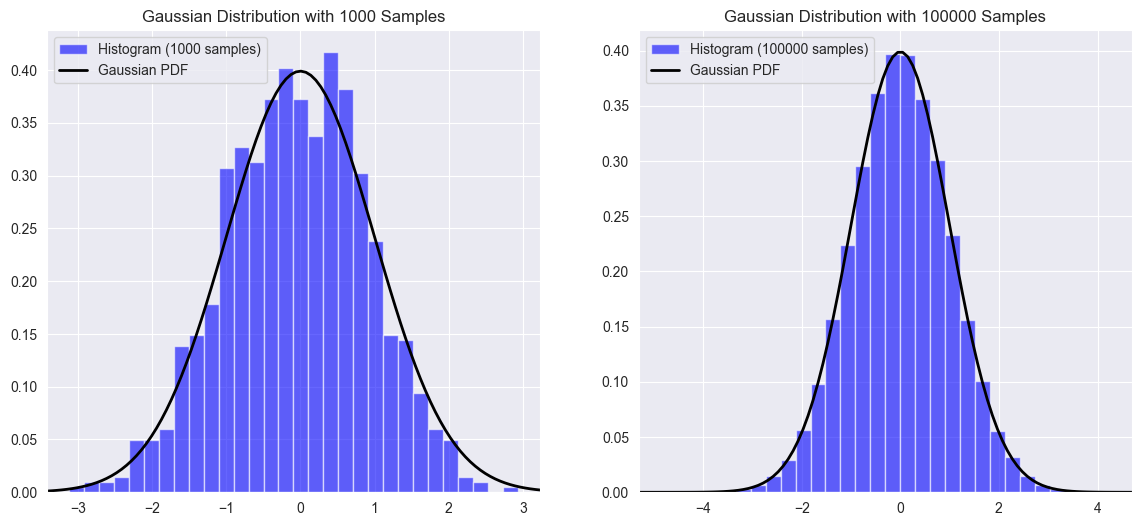

In [19]:
# Parameters for the Gaussian distribution
mean = 0
std_dev = 1

# Generate 1000 random data points from a Gaussian distribution
data_1000 = np.random.normal(mean, std_dev, 1000)

# Generate 100000 random data points from a Gaussian distribution
data_100000 = np.random.normal(mean, std_dev, 100000)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 1000 samples
axs[0].hist(data_1000, bins=30, density=True, alpha=0.6, color='b', label='Histogram (1000 samples)')
xmin, xmax = axs[0].set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axs[0].plot(x, p, 'k', linewidth=2, label='Gaussian PDF')
axs[0].set_title('Gaussian Distribution with 1000 Samples')
axs[0].legend()

# Plot for 100000 samples
axs[1].hist(data_100000, bins=30, density=True, alpha=0.6, color='b', label='Histogram (100000 samples)')
xmin, xmax = axs[1].set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axs[1].plot(x, p, 'k', linewidth=2, label='Gaussian PDF')
axs[1].set_title('Gaussian Distribution with 100000 Samples')
axs[1].legend()

# Show the plot
plt.show();

Once again, according to law of large numbers as we sample more from the standard gaussian distribution the sample mean will move closer and closer to the expected value of the gaussian distribution, which is just the mean. According to Borel's law of large number the frequencies of the samples will also tend to the probabilities of the gaussian. This was just to show the appearance of a standard gaussian, which corresponds to the white distribution.

## 16 Multivariate gaussian distribution
**Definition**
\
$f(\textbf{x}, \sum) = \frac{1}{(2\pi)^{k/2}det(\sum)^{1/2}} e^{-\frac{1}{2}(\textbf{x} - \mu)^T \sum^{-1} (\textbf{x} - \mu)}$

where $\mu$ is the mean vector of size n, $\sum$ is the 2D covariance matrix of size nxn and input $\textbf{x}$ is a random vector of size n. $det\left(\sum\right)$ is the [determinant](https://en.wikipedia.org/wiki/Determinant) of the covariance matrix and $\left(\sum\right)^{-1}$ is the inverse of the covariance matrix. The covariance matrix contains covariances of each pairwise r.v variable, while the diagonal contains the variances of each variable.

\
**Interpretation**
\
The input vector $\textbf{X}$ is thought of as a random vector, where each r.v is gaussian distributed, but they are not necessarily independent. The dependency between them is captured by the covariance matrix. In the case of the covariance matrix being diagonal, i.e. the off-diagonals are all zero, then the r.v in the random vector $\textbf{X}$ can be thought of as independent gaussian distributed r.v with their own mean and variance. For a general multivariate gaussian the way to interpret it is to think of it as a joint normal distribution, but because we have more than 1 variable this is in higher dimension than 1 and this is determined by the number of r.v, n r.v will produce a n-dimensional joint normal distribution. So the r.v have a dependency between each other, which is captured by the covariance matrix and the multivariate gaussian just models the joint of them taking the covariances into account. 

\
Geometrically looking at the contours of the pdf of the multivariate gaussian, one can show that the axes of the ellipsoidal structure are determined by the eigenvectors of the covariance matrix, whose lengths are determined by the eigenvalues. The eigenvectors represent the directions of maximum variance (principal axes) in the data, while the corresponding eigenvalues represent the variance along each of these directions. The orientation of the distribution is aligned with the eigenvectors, and the shape is determined by the eigenvalues, with larger eigenvalues corresponding to greater spread along the principal axes. Therefore, the covariance matrix decides the shape and orientation of the multivariate gaussian distribution.

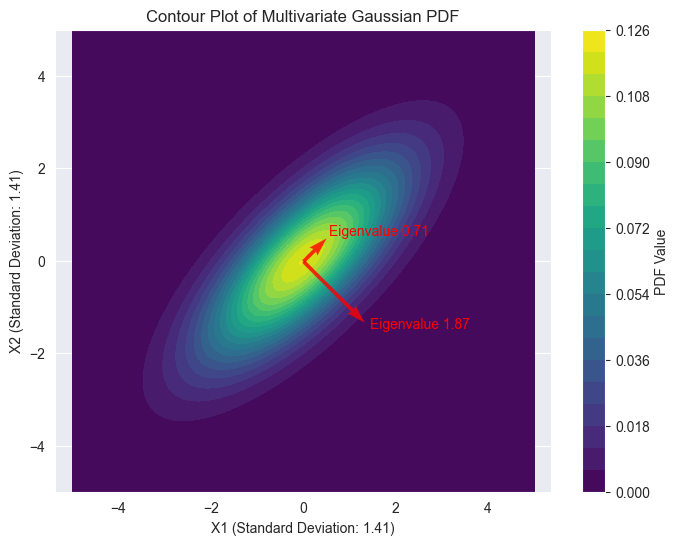

In [20]:
# Parameters of the multivariate Gaussian distribution
mean = np.array([0, 0])  # Mean vector
covariance_matrix = np.array([[2, 1.5], [1.5, 2]])  # Covariance matrix

# Generate random samples from the multivariate Gaussian distribution
num_samples = 1000
samples = np.random.multivariate_normal(mean, covariance_matrix, num_samples)

# Create a meshgrid for the contour plot
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
pos = np.dstack((x, y))

# Calculate the multivariate Gaussian PDF values at each point of the meshgrid
pdf_values = multivariate_normal(mean, covariance_matrix).pdf(pos)

# Plot the contour of the PDF
plt.figure(figsize=(8, 6))
plt.contourf(x, y, pdf_values, cmap='viridis', levels=20)
plt.colorbar(label='PDF Value')
plt.xlabel('X1 (Standard Deviation: {:.2f})'.format(np.sqrt(covariance_matrix[0, 0])))
plt.ylabel('X2 (Standard Deviation: {:.2f})'.format(np.sqrt(covariance_matrix[1, 1])))
plt.title('Contour Plot of Multivariate Gaussian PDF')

# Plot the eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
for i in range(2):
    plt.quiver(mean[0], mean[1], eigenvectors[i, 0]*np.sqrt(eigenvalues[i]), eigenvectors[i, 1]*np.sqrt(eigenvalues[i]),
               angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)
    plt.text(mean[0] + eigenvectors[i, 0]*np.sqrt(eigenvalues[i]) * 1.1,
             mean[1] + eigenvectors[i, 1]*np.sqrt(eigenvalues[i]) * 1.1,
             'Eigenvalue {:.2f}'.format(np.sqrt(eigenvalues[i])), color='red')

plt.grid(True)
plt.axis('equal')
plt.show();

I will be honest, not sure what this plot says. It's kind of strange that the standard deviation is a constant for each X1 and X2? Anyways in theory one of the eigenvectors point in the direction of highest variance, while the other points in the direction of lowest variance. And the eigenvalues give how much variance exists along these directions.

## 17 Markov chain
A Markov chain is a stochastic process that involves a sequence of random events, where the probability of each event depends only on the outcome of the preceding event. Formally, a Markov chain consists of a set of states and a transition matrix that specifies the probabilities of transitioning from one state to another. The key assumption of a Markov chain is that the future state depends only on the current state and not on any previous states, which is often referred to as the Markov property. The reason I bring up markov chain is because diffusion models are markov chains, where the next step only depends on the previous (well with diffusion kernel you only need to care about the very first sample).

**Simple markov chain example simulating a weather system**

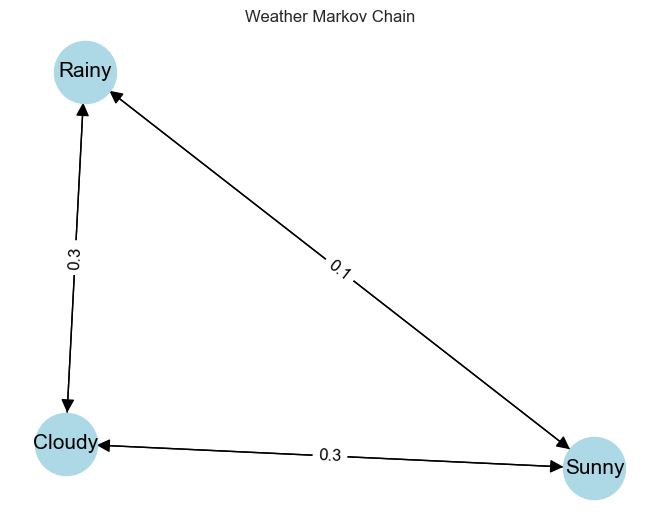

In [21]:
# Define the states and transition probabilities
states = ['Sunny', 'Cloudy', 'Rainy']
transition_probabilities = np.array([
    [0.7, 0.2, 0.1],  # Transition probabilities from Sunny
    [0.3, 0.4, 0.3],  # Transition probabilities from Cloudy
    [0.1, 0.3, 0.6]   # Transition probabilities from Rainy
])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for state in states:
    G.add_node(state)

# Add edges with weights
for i, state in enumerate(states):
    for j, next_state in enumerate(states):
        if i != j:
            probability = transition_probabilities[i][j]
            G.add_edge(state, next_state, weight=probability)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15, arrowsize=20)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title('Weather Markov Chain')
plt.show();

In [22]:
def simulate_weather_chain(start_state, transition_probabilities, num_days):
    # Initialize the sequence with the start state
    weather_sequence = [start_state]
    current_state_index = states.index(start_state)

    # Simulate transitions for each day
    for _ in range(num_days):
        # Choose the next state based on the transition probabilities
        next_state_index = np.random.choice(len(states), p=transition_probabilities[current_state_index])
        next_state = states[next_state_index]

        # Add the next state to the sequence
        weather_sequence.append(next_state)

        # Update the current state index
        current_state_index = next_state_index

    return weather_sequence

# Simulate weather events for 7 days starting from 'Sunny'
start_state = 'Sunny'
num_days = 7
weather_sequence = simulate_weather_chain(start_state, transition_probabilities, num_days)
print("Simulated Weather Sequence:", weather_sequence)

Simulated Weather Sequence: ['Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Cloudy']


This is a Markov chain with three states representing different weather conditions: sunny, cloudy, and rainy. The transition probabilities are defined in the transition_probabilities matrix. For example, if it's currently sunny, there's a 70% chance of it remaining sunny, a 20% chance of it becoming cloudy, and a 10% chance of it becoming rainy. The simulation above takes a starting state "sunny" and traverses the graph sampling the next state based on the transition probability matrix. This simulates 7 days of weather starting from "sunny" day.

## 18 Central limit theorem
I should preface with saying that there are different variants of [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem).
The Central Limit Theorem (CLT) states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution. It also applies to r.vs that are approximately independent. This is a very useful insight from wiki
> The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

That also explains why gaussian distribution is so often used in probability and statistical problems to approximate other distributions.

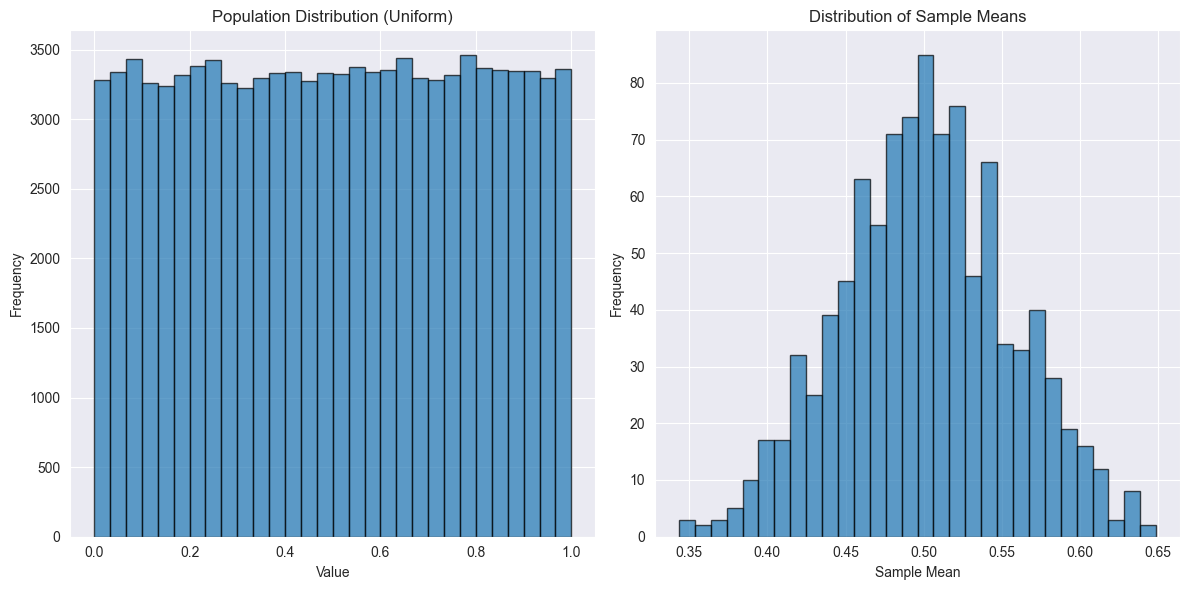

In [23]:
# Parameters
population_size = 100000
sample_size = 30
num_samples = 1000

# Generate a population from a uniform distribution
population = np.random.uniform(low=0.0, high=1.0, size=population_size)

# Draw multiple samples and compute their means
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Plot the population distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(population, bins=30, edgecolor='k', alpha=0.7)
plt.title('Population Distribution (Uniform)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

The population is a uniform distribution and is being sampled 100000 times. The sample means are calculated each time a sampling is being done. The distribution of these sample means converges to that of a normal distribution as can be seen in the plot. This illustrates the heart of CLT, that in the limit when $n \to \infty$ then the distribution of the sample mean converges to a normal distribution.